#Importing Libraries

In [ ]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Data Preprocessing

##Just for Practice

In [ ]:
df=pd.DataFrame({"Age":[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})


Updated DataFrame: df=pd.DataFrame({"Age":[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 31, 50]})

Steps to Calculate IQR:

Sorted Data: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 50]

Finding Q1:

Since there are 14 data points, Q1 is the value at the position (14 + 1) * 0.25 = 3.75 (Need to round to nearest int because its index number).
Q1 = 4th element in the sorted dataset = 23
Finding Q3:

Q3 is the value at the position (14 + 1) * 0.75 = 11.25 (rounded to 11).
Q3 = 11th element in the sorted dataset = 30
Calculating IQR:

IQR = Q3 - Q1 = 30 - 23 = 7
Why the IQR Changed:

More Data Points: Adding the values 31 and 32 to the dataset leads to having 14 data points compared to 12.
Shift in Quartiles: With the new data points, the positions of Q1 and Q3 within the sorted dataset have shifted.
Q1: shifted from 22.5 to 23
Q3: shifted from 28.5 to 30
Wider Spread: The middle 50% of the data now spans a larger range, resulting in a larger IQR.
In summary, with the updated DataFrame:

Q1 = 23
Q3 = 30
IQR = 7
The IQR has increased to 7, reflecting a wider spread of the middle 50% of the 'Age' data due to the inclusion of the new data points.

<Axes: xlabel='Age', ylabel='Count'>

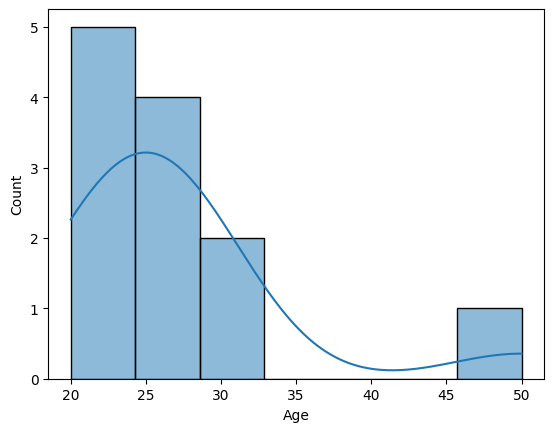

In [ ]:
sns.histplot(df,x='Age',kde=True)

<Axes: ylabel='Age'>

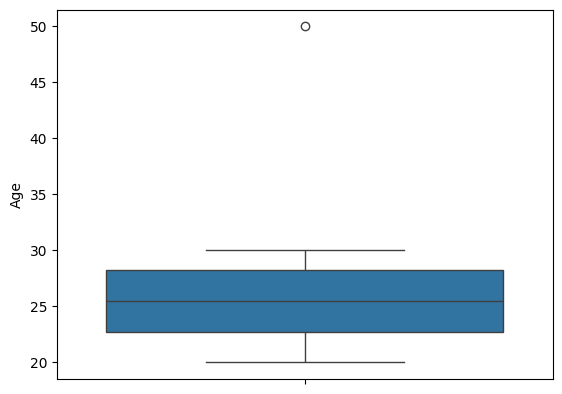

In [ ]:
# sns.boxplot(df,x='Age')
sns.boxplot(df,y='Age')

###Standardization (Z-score)

In [ ]:
df['mean']=np.mean(df['Age'])
df['std']=np.std(df['Age'])
df['z_score']=(df['Age']-df['mean'])/df['std']
df

,Age,mean,std,z_score
0,20,27.083333,7.543853,-0.938954
1,21,27.083333,7.543853,-0.806396
2,22,27.083333,7.543853,-0.673838
3,23,27.083333,7.543853,-0.541280
4,24,27.083333,7.543853,-0.408721
5,25,27.083333,7.543853,-0.276163
6,26,27.083333,7.543853,-0.143605
7,27,27.083333,7.543853,-0.011047
8,28,27.083333,7.543853,0.121512
9,29,27.083333,7.543853,0.254070


In [ ]:
print((12+1)*0.25)
print((12+1)*0.75)

3.25
9.75


In [ ]:
df=pd.DataFrame({"Age":[10,20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
print(Q1)
print(Q3)
IQR=Q3-Q1
print(IQR)
lower_boundry=Q1 - 1.5 * IQR
upper_boundry=Q3 + 1.5 * IQR
print(lower_boundry)
print(upper_boundry)

df['Age']=np.where((df['Age']>upper_boundry) | (df['Age']< lower_boundry),df['Age'].median(),df['Age'])
# df[col] = np.where((df[col] < lower_boundry) | (df[col] > upper_boundry),df[col].median(),df[col])
df

22.0
28.0
6.0
13.0
37.0


,Age
0,25.0
1,20.0
2,21.0
3,22.0
4,23.0
5,24.0
6,25.0
7,26.0
8,27.0
9,28.0


##Scalling


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler

In [ ]:

# make an example dataset
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

df=pd.DataFrame(df)
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


###StandardScaler()

**Standard scaling** is a method of scaling the data such that the distribution of the data is centered around 0, with a standard deviation of 1. This is done by subtracting the mean of the data from each data point and then dividing by the standard deviation of the data. This is a very common method of scaling data, and is used in many machine learning algorithms.

The formula is as follows:

z = (x - μ) / σ

Range=-3 to +3

In [ ]:
standard_scaler=StandardScaler()
scaled_df=standard_scaler.fit_transform(df) #it will return an array not dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df


,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


In [ ]:
scaled_df.describe()

,age,height,weight
count,5.000000,5.000000,5.000000
mean,0.000000,0.000000,0.000000
std,1.118034,1.118034,1.118034
min,-1.414214,-1.414214,-1.414214
25%,-0.707107,-0.707107,-0.707107
50%,0.000000,0.000000,0.000000
75%,0.707107,0.707107,0.707107
max,1.414214,1.414214,1.414214


###MinMaxScaler()

range=0 to 1

In [ ]:
min_max_scaler=MinMaxScaler()

min_max_array=min_max_scaler.fit_transform(df)

min_max_df=pd.DataFrame(min_max_array,columns=df.columns)
min_max_df


,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


In [ ]:
min_max_df.describe()

,age,height,weight
count,5.000000,5.000000,5.000000
mean,0.500000,0.500000,0.500000
std,0.395285,0.395285,0.395285
min,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000
50%,0.500000,0.500000,0.500000
75%,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000


###Max ABS scalar()

Range= -1 to +1

In [ ]:
max_abs_scaler=MaxAbsScaler()

max_abs_array=max_abs_scaler.fit_transform(df)

max_abs_df=pd.DataFrame(max_abs_array,columns=df.columns)
max_abs_df

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


##Transformation

In [ ]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

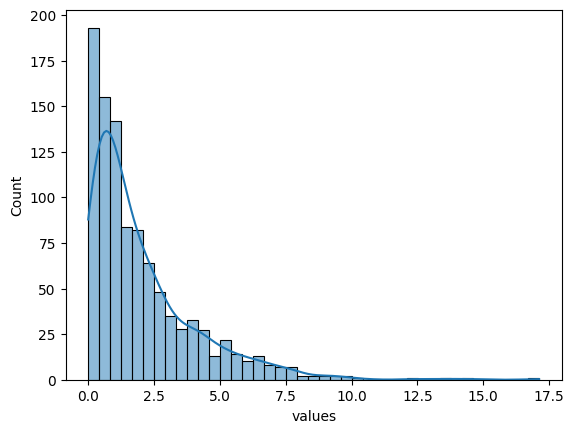

In [ ]:
sns.histplot(df,x='values',kde=True)

###PowerTransformer (method=box-cox, yoe-johnson)

In [ ]:
from sklearn.preprocessing import PowerTransformer,QuantileTransformer

power_trans_boxcox=PowerTransformer(method='box-cox')
power_trans_yeo_johnson=PowerTransformer(method='yeo-johnson')

df['box-cox']=power_trans_boxcox.fit_transform(df[['values']]+1)
df['yeo-johnson']=power_trans_yeo_johnson.fit_transform(df[['values']])

df

,values,box-cox,yeo-johnson
0,1.591749,0.179335,0.179335
1,2.511862,0.677331,0.677331
2,1.846446,0.339698,0.339698
3,1.574402,0.167607,0.167607
4,1.102097,-0.202107,-0.202107
...,...,...,...
995,0.205564,-1.390405,-1.390405
996,1.446892,0.077828,0.077828
997,5.574577,1.527375,1.527375
998,0.519217,-0.862872,-0.862872


In [ ]:
df.describe()

,values,box-cox,yeo-johnson
count,1000.000000,1.000000e+03,1.000000e+03
mean,2.007080,2.198242e-16,6.306067e-17
std,2.059218,1.000500e+00,1.000500e+00
min,0.001092,-1.852432e+00,-1.852432e+00
25%,0.569010,-7.932213e-01,-7.932213e-01
50%,1.312952,-2.389207e-02,-2.389206e-02
75%,2.673183,7.457937e-01,7.457937e-01
max,17.122062,2.511472e+00,2.511472e+00


###QuantileTransformer()

In [ ]:
quantile_transformer=QuantileTransformer(output_distribution='normal')

df['quantile_normal']=quantile_transformer.fit_transform(df[['values']])
df


,values,box-cox,yeo-johnson,quantile_normal
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930
...,...,...,...,...
995,0.205564,-1.390405,-1.390405,-1.315958
996,1.446892,0.077828,0.077828,0.074087
997,5.574577,1.527375,1.527375,1.475269
998,0.519217,-0.862872,-0.862872,-0.748009


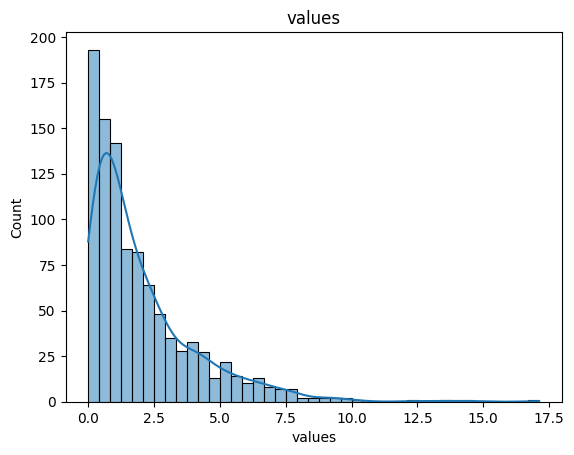

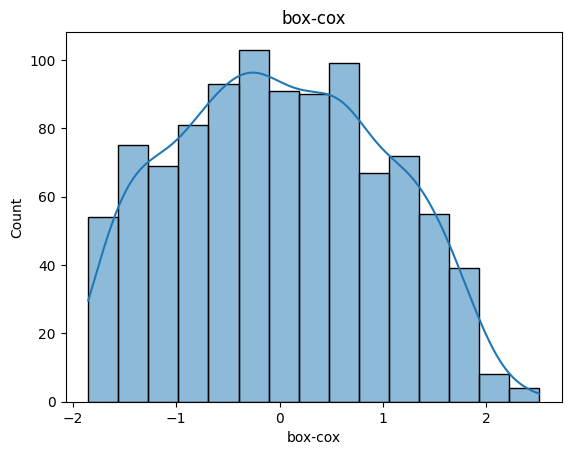

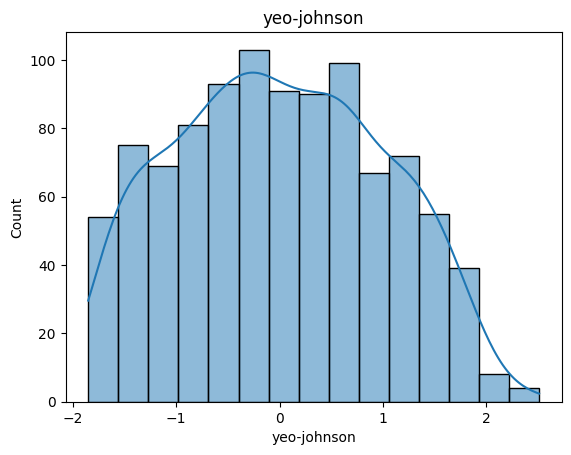

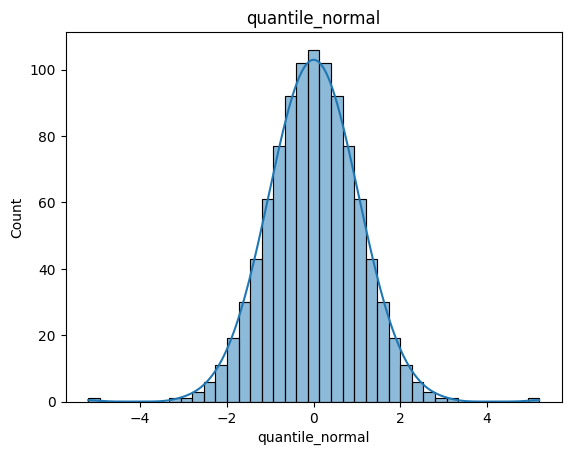

In [ ]:
for col in df.columns:

    sns.histplot(df,x=col,kde=True)
    plt.title(col)
    plt.show()

##Normalization

Data Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

###Normalizer (norm=l2)

**L2 Normalization:**
Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data. The L2 norm is calculated as the square root of the sum of the squared vector values.

In [ ]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [2, 1, 0], [2, 2, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.89442719 0.4472136  0.        ]
 [0.70710678 0.70710678 0.        ]]


###Normalizer (norm=l1)

We have three data points, each with three features.

**L2 Normalization Calculation:**

For each data point, we calculate the L2 norm and then divide each feature value by that norm.

Data Point 1: [1, 1, 1]

Calculate L2 norm: √(1² + 1² + 1²) = √3
Normalize: [1/√3, 1/√3, 1/√3] ≈ [0.577, 0.577, 0.577]
Data Point 2: [2, 1, 0]

Calculate L2 norm: √(2² + 1² + 0²) = √5
Normalize: [2/√5, 1/√5, 0/√5] ≈ [0.894, 0.447, 0]
Data Point 3: [2, 2, 0]

Calculate L2 norm: √(2² + 2² + 0²) = √8
Normalize: [2/√8, 2/√8, 0/√8] ≈ [0.707, 0.707, 0]
Normalized Data:

After applying L2 normalization to all data points, the transformed data would look like this:





```
[[0.577, 0.577, 0.577],
 [0.894, 0.447, 0],
 [0.707, 0.707, 0]]
```



**How L1 Normalization Works:**
L1 normalization rescales each data point (row) so that the sum of the absolute values of its features equals 1.

Here's how it's calculated:

Calculate the L1 norm: For each data point, sum the absolute values of its features.
Normalize: Divide each feature value by the L1 norm of that data point.
Example for the first data point [1, 1, 1]:

L1 norm: |1| + |1| + |1| = 3
Normalization:
Feature 1: 1 / 3 = 0.333
Feature 2: 1 / 3 = 0.333
Feature 3: 1 / 3 = 0.333
The normalized data point becomes [0.333, 0.333, 0.333]. This process is repeated for all data points in the dataset.

In [ ]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


###Log Transformation

In [ ]:
# example dataset with skewed values
values = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000,1000000]}
df=pd.DataFrame(values)
df

,Values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,2000


In [ ]:
df['log_values']=np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


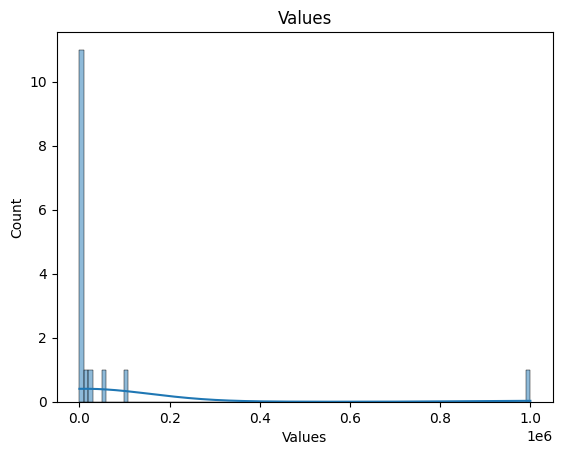

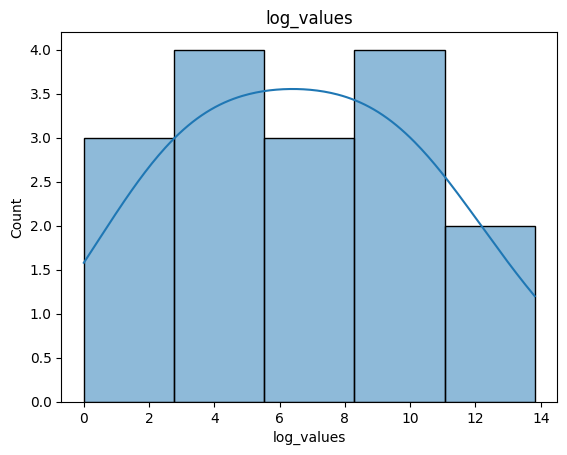

In [ ]:
for col in df.columns:
    plt.title(col)
    sns.histplot(df,x=col,kde=True)
    plt.show()

##Feature Encoding

Feature encoding is the process of transforming categorical features into numeric features. This is necessary because machine learning algorithms can only handle numeric features. There are many different ways to encode categorical features, and each method has its own advantages and disadvantages. In this notebook, we will explore some of the most popular methods for encoding categorical features, such as:

1. Label encoding
2. Ordinal encoding
3. One-hot encoding
4. Binary encoding
5. Manual Encoding
6. Category Encoding

In [ ]:
# data load
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
for col in df.columns:
    print(df[col].value_counts())
    print('=====================')

total_bill
13.42    3
21.01    2
20.69    2
10.33    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64
tip
2.00    33
3.00    23
4.00    12
2.50    10
5.00    10
        ..
1.47     1
1.17     1
4.67     1
5.92     1
1.75     1
Name: count, Length: 123, dtype: int64
sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64
size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


###LabelEncoder ( )

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['sex_label_encoded']=label_encoder.fit_transform(df['sex'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_label_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


###OrdinalEncoder ( )

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder=OrdinalEncoder(categories=[['Thur','Fri','Sat','Sun']]) categories means defining order
# df['day_ordinal_encoded']=ordinal_encoder.fit_transform(df[['day']])

ordinal_encoder=OrdinalEncoder()
df['day_ordinal_encoded_unordered']=ordinal_encoder.fit_transform(df[['day']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_label_encoded,day_ordinal_encoded,day_ordinal_encoded_unordered
0,16.99,1.01,Female,No,Sun,Dinner,2,0,3.0,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,3.0,2.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,3.0,2.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,3.0,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,3.0,2.0


In [ ]:
df['day_ordinal_encoded'].value_counts()

,count
day_ordinal_encoded,
2.0,87
3.0,76
0.0,62
1.0,19


In [ ]:
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


###OneHotEncoder ( )

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# one hot encoding on day column
ohe = OneHotEncoder()
encoded_sex = ohe.fit_transform(df[['sex']]).toarray()
encoded_sex_df = pd.DataFrame(encoded_sex, columns=ohe.get_feature_names_out(['sex']))
df = pd.concat([df, encoded_sex_df], axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,sex_label_encoded,day_ordinal_encoded,day_ordinal_encoded_unordered,sex_Female,sex_Male
0,16.99,1.01,Female,No,Sun,Dinner,2,0,3.0,2.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,3.0,2.0,0.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,3.0,2.0,0.0,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,3.0,2.0,0.0,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,3.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,2.0,1.0,0.0,1.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,2.0,1.0,1.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,2.0,1.0,0.0,1.0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,2.0,1.0,0.0,1.0


###category_encoders . BinaryEncoder ( )

In [ ]:
!pip install category_encoders

from category_encoders import BinaryEncoder

binary_encoder = BinaryEncoder()
# df['binary_encoder1','binary_encoder2'] = binary_encoder.fit_transform(df['smoker'])

df[['binary_encoder1','binary_encoder2']] = binary_encoder.fit_transform(df['smoker'])
df_binary.head()
df

,total_bill,tip,sex,smoker,day,time,size,sex_label_encoded,day_ordinal_encoded,day_ordinal_encoded_unordered,sex_Female,sex_Male,binary_encoder1,binary_encoder2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,3.0,2.0,1.0,0.0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,3.0,2.0,0.0,1.0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,3.0,2.0,0.0,1.0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,3.0,2.0,0.0,1.0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,3.0,2.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,2.0,1.0,0.0,1.0,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,2.0,1.0,1.0,0.0,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,2.0,1.0,0.0,1.0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,2.0,1.0,0.0,1.0,0,1


###Manual Encoding (.map)

In [ ]:
df['manual_encoding(map)']=df['time'].map({'Dinner':0,'Lunch':1})
df

,total_bill,tip,sex,smoker,day,time,size,sex_label_encoded,day_ordinal_encoded,day_ordinal_encoded_unordered,sex_Female,sex_Male,binary_encoder1,binary_encoder2,manual_encoding(map)
0,16.99,1.01,Female,No,Sun,Dinner,2,0,3.0,2.0,1.0,0.0,0,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,3.0,2.0,0.0,1.0,0,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,3.0,2.0,0.0,1.0,0,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,3.0,2.0,0.0,1.0,0,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,3.0,2.0,1.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,2.0,1.0,0.0,1.0,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,2.0,1.0,1.0,0.0,1,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,2.0,1.0,0.0,1.0,1,0,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,2.0,1.0,0.0,1.0,0,1,0


In [ ]:
df['manual_encoding(map)'].value_counts()

,count
manual_encoding(map),
0,176
1,68


#Pipeline in Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    RobustScaler,
    PowerTransformer,
    QuantileTransformer,
    Normalizer,
    OneHotEncoder,
    LabelEncoder,
    OrdinalEncoder,

)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#load the titanic dataset
df=sns.load_dataset('titanic')

#select features and target variables
x=df[['pclass', 'sex', 'age', 'fare', 'embarked']]
y=df['survived']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

numeric_features=['age','fare']
categorical_features=['pclass','sex','embarked']

standard_scaler=StandardScaler()
min_max_scaler=MinMaxScaler()
max_abs_scaler=MaxAbsScaler()
robust_scaler=RobustScaler()
power_trans_boxcox=PowerTransformer(method='box-cox')
power_trans_yeo_johnson=PowerTransformer(method='yeo-johnson')
quantile_transformer=QuantileTransformer(output_distribution='normal')

numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',min_max_scaler),
    # ('scaler',standard_scaler),
    # ('scaler',max_abs_scaler),
    # ('scaler',robust_scaler),
    # ('scaler',power_trans_boxcox),
    # ('scaler',power_trans_yeo_johnson),
    # ('scaler',quantile_transformer)
])

categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier(random_state=42))
])

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7821229050279329


#Linear Regression | Pipeline | Save and Load a trained Model | Model Evaluation

##Small Dataset

Simple Linear Regression
Simple linear regression is an approach for predicting a response using a single feature. It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

The linear function can be represented as:


For Simple Linear Regression:
```
 y=mx+c
```




For Multimple Linear Regression:
```
 y=m1x1 + m2x2 .........+c
```


Where:

- y is the response
- x is the feature
- m is the slope
- c is the intercept
- m and c are the coefficients of the model

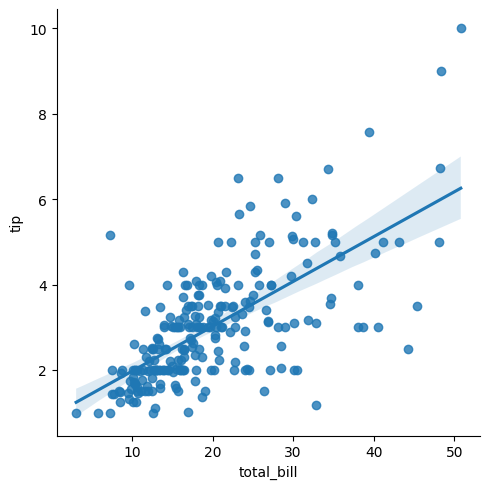

In [ ]:
from sklearn.linear_model import LinearRegression
df=sns.load_dataset('tips')

sns.lmplot(df,x='total_bill',y='tip')



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['total_bill','tip']]=scaler.fit_transform(df[['total_bill','tip']])
df

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,2
1,-1.063235,-0.969205,Male,No,Sun,Dinner,3
2,0.137780,0.363356,Male,No,Sun,Dinner,3
3,0.438315,0.225754,Male,No,Sun,Dinner,2
4,0.540745,0.443020,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,3
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,2
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,2
242,-0.221287,-0.904026,Male,No,Sat,Dinner,2


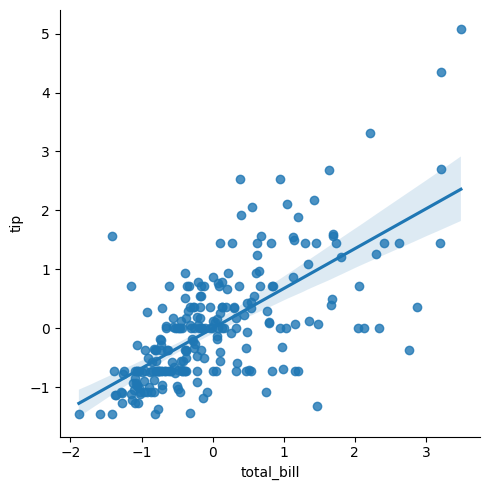

In [ ]:
sns.lmplot(df,x='total_bill',y='tip')


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,root_mean_squared_error
from sklearn.model_selection import train_test_split
# separate the features X and the target/labels y
x = df[['total_bill']]
y = df['tip']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)


print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R2: {r2_score(y_test,y_pred)}')

MAE: 0.4496364577054319
MSE: 0.2983382530785567
RMSE: 0.5462034905404365
RMSE: 0.5462034905404365
R2: 0.5449381659234667


###Save and load a trained Machine Learning model

In [ ]:
df['total_bill'].max()

3.492067936654957

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
load_model=pickle.load(open('model.pkl','rb'))
load_model.predict([[10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.91349344])

###Multi Linear Regression

In [ ]:
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('tips')
df.head()

X = df[['total_bill', 'size', 'day']]
y = df['tip']

# preprocess the data
scalar = StandardScaler()
X[['total_bill', 'size']] = scalar.fit_transform(X[['total_bill', 'size']])
le = LabelEncoder()
X['day'] = le.fit_transform(X['day'])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# call the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# metric to evaluate the model
y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
# print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.6566031847646812
R2 Score: 0.4747054104497258
Mean Absolute Error: 0.6656656656006282
Root Mean Squared Error: 0.8103105483483978


###Using Pipline

In this notebook, we will use the Pipeline class from the sklearn library to create a multi-linear regression model. The Pipeline class allows us to chain multiple estimators into a single estimator. This makes it easier to work with multiple steps in a machine learning workflow.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('tips')
# separate the features X and the target/labels y
x = df[['total_bill', 'size', 'day']] #Remember 2-Dimensions
y = df['tip']

# numeric features
numeric_features = ['total_bill', 'size']
# categorical features
categorical_features = ['day']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(), categorical_features)
    ]
)

# train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

# fit the model
model.fit(x_train, y_train)

# metric to evaluate the model
y_pred = model.predict(x_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.6566031847646816
R2 Score: 0.4747054104497255
Mean Absolute Error: 0.6656656656006282
Mean Absolute Percentage Error: 0.2789919978935491
Root Mean Squared Error: 0.8103105483483981


## Go for Big Dataset

- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, - -  Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)
- price: price in US dollars (
18,823)
- x: length in mm (0--10.74)
- y: width in mm (0--58.9)
- z: depth in mm (0--31.8)

In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df=sns.load_dataset('diamonds')

x=df.drop('price',axis=1)
y=df['price']

numeric_features=['carat','depth','table','x','y','z']

categorical_features=['cut','color','clarity']

preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_features),
        ('cat',OrdinalEncoder(),categorical_features)
    ]
)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.1,random_state=42)

model=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('model',LinearRegression())
    ]
)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 2107515.3755979915
R2 Score: 0.8669878199014684
Mean Absolute Error: 864.7346165543507
Mean Absolute Percentage Error: 0.38614446880587416
Root Mean Squared Error: 1451.728409723386
CPU times: user 139 ms, sys: 13.4 ms, total: 152 ms
Wall time: 137 ms


#15 Ways to improve the ML Model's performance?

1. **Feature Engineering:** Create new features that capture additional information from the data.
2. **Hyperparameter Tuning:** Optimize the model's hyperparameters to improve performance.
3. **Regularization:** Apply regularization techniques to prevent overfitting.
4. **Ensemble Methods:** Use ensemble methods such as Random Forest or Gradient Boosting to improve predictive performance.
5. **Cross-Validation:** Use cross-validation to assess the model's performance more accurately.
6. **Feature Selection:** Identify and select the most relevant features for the model.
7. **Data Preprocessing:** Clean and preprocess the data to improve model performance.
8. **Model Selection:** Experiment with different regression models to find the best fit for the data.
9. **Error Analysis:** Analyze the model's errors to identify patterns and areas for improvement.
10. **Domain Knowledge:** Incorporate domain knowledge to improve the model's predictive power.
11. **Data Augmentation:** Increase the size of the training data through data augmentation techniques.
12. **Model Stacking:** Combine multiple models to improve predictive performance.
13. **Model Interpretation:** Interpret the model's predictions to gain insights into the data and improve performance.
14. **Model Deployment:** Deploy the model in a production environment and monitor its performance over time.
15. **Feedback Loop:** Incorporate feedback from users and stakeholders to continuously improve the model.


##How to improve the ML model's Performance?

In [ ]:
# load the data
df = sns.load_dataset('diamonds')

# list the categorical features you want to encode
categorical_features = ['cut', 'color', 'clarity']

# loop through the features and encode each column
encoder = OrdinalEncoder()
for col in categorical_features:
    df[[col]] = encoder.fit_transform(df[[col]]) # Now 'df' is a DataFrame and this should work

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,3.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1.0,0.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4.0,0.0,2.0,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3.0,4.0,3.0,61.0,58.0,2757,6.15,6.12,3.74


###LinearRegression

In [ ]:

%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
x = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# pipeline
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

# fit the model
model.fit(x_train, y_train)

# metric to evaluate the model
y_pred = model.predict(x_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 1288705.4778516744
R2 Score: 0.9189331350419387
Mean Absolute Error: 737.1513665933275
Mean Absolute Percentage Error: 0.39529335164943247
Root Mean Squared Error: 1135.2116445190625
CPU times: user 253 ms, sys: 10.5 ms, total: 263 ms
Wall time: 217 ms


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df.shape)

(43152, 9)
(10788, 9)
(43152,)
(10788,)
(53940, 10)


###DecisionTreeRegression

In [ ]:

%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
x = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# pipeline
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor())
    ]
)

# fit the model
model.fit(x_train, y_train)

# metric to evaluate the model
y_pred = model.predict(x_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 554593.8396829811
R2 Score: 0.9651129100629713
Mean Absolute Error: 358.97645532072676
Mean Absolute Percentage Error: 0.0856847643542938
Root Mean Squared Error: 744.710574440152
CPU times: user 833 ms, sys: 2.65 ms, total: 835 ms
Wall time: 1.34 s


###RandomForestRegression

In [ ]:

%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
x = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# pipeline
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor())
    ]
)

# fit the model
model.fit(x_train, y_train)

# metric to evaluate the model
y_pred = model.predict(x_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 304681.2509607708
R2 Score: 0.980833825686793
Mean Absolute Error: 270.98639757762885
Mean Absolute Percentage Error: 0.06492269853507979
Root Mean Squared Error: 551.9793936015826
CPU times: user 34 s, sys: 464 ms, total: 34.4 s
Wall time: 36.6 s


###XGBRegressor

In [ ]:

%%time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
x = df.drop('price', axis=1)
y = df['price']

# numeric features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']

# preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# pipeline
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', XGBRegressor())
    ]
)

# fit the model
model.fit(x_train, y_train)

# metric to evaluate the model
y_pred = model.predict(x_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 318286.3125
R2 Score: 0.9799779653549194
Mean Absolute Error: 285.61346435546875
Mean Absolute Percentage Error: 0.07398492097854614
Root Mean Squared Error: 564.1686915276316
CPU times: user 1.19 s, sys: 29.4 ms, total: 1.22 s
Wall time: 752 ms


###Over All Performance of Models

**Linear Regression**
- Mean Squared Error: 1288705.4778516744
- R2 Score: 0.9189331350419387
- Mean Absolute Error: 737.1513665933275
- Mean Absolute Percentage Error: 0.39529335164943247
- Root Mean Squared Error: 1135.2116445190625
- CPU times: user 253 ms, sys: 10.5 ms, total: 263 ms
- Wall time: 217 ms

**DecisionTreeRegressor**

- Mean Squared Error: 554593.8396829811
- R2 Score: 0.9651129100629713
- Mean Absolute Error: 358.97645532072676
- Mean Absolute Percentage Error: 0.0856847643542938
- Root Mean Squared Error: 744.710574440152
- CPU times: user 833 ms, sys: 2.65 ms, total: 835 ms
- Wall time: 1.34 s

**RandomForestRegressor 1st**

- Mean Squared Error: 304681.2509607708
- R2 Score: 0.980833825686793
- Mean Absolute Error: 270.98639757762885
- Mean Absolute Percentage Error: 0.06492269853507979
- Root Mean Squared Error: 551.9793936015826
- CPU times: user 34 s, sys: 464 ms, total: 34.4 s
- Wall time: 36.6 s

**XGBRegressor 2nd**

   - Mean Squared Error: 318286.3125
   - R2 Score: 0.9799779653549194
   - Mean Absolute Error: 285.61346435546875
   - Mean Absolute Percentage Error: 0.07398492097854614
   - Root Mean Squared Error: 564.1686915276316
   - CPU times: user 1.19 s, sys: 29.4 ms, total: 1.22 s
   - Wall time: 752 ms

#Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x), and has been used to describe nonlinear phenomena such as the growth rate of tissues, the distribution of carbon isotopes in lake sediments, and the progression of disease epidemics.

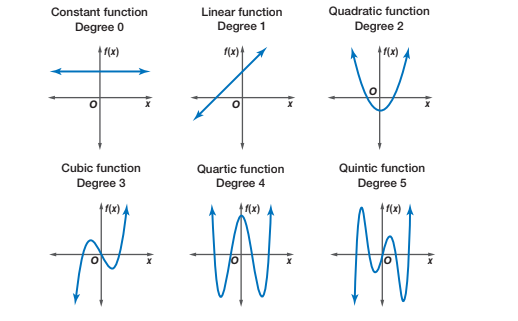

<Axes: >

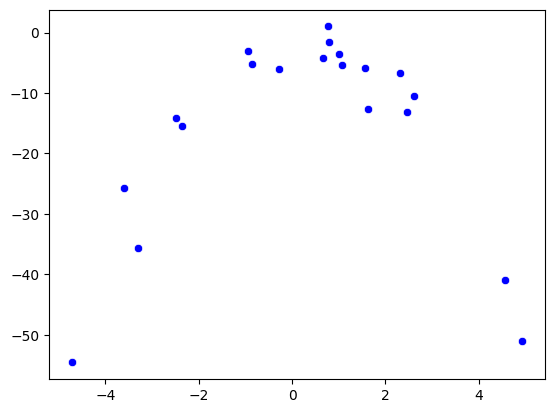

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator

# Step 1: Create Dummy Data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + np.random.normal(-3, 3, 20)

# Reshaping for the model
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# plot x and y
sns.scatterplot(x=x.flatten(), y=y.flatten(), color='blue')

MSE: 264.7333784538786
R2: 0.010009603077459461
MAE: 12.707910059939305
MAPE: 2.4057028094686266


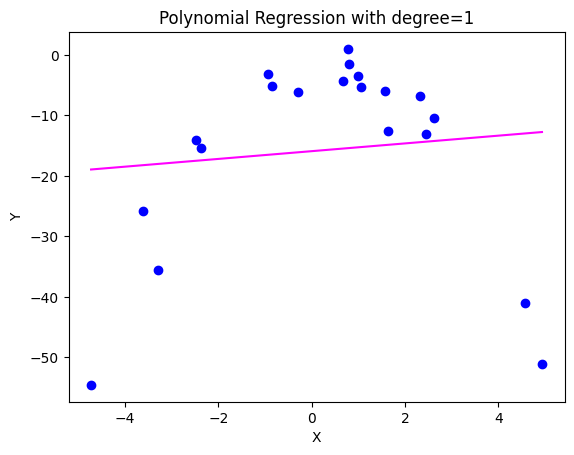

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import operator

# Step 1: Create Dummy Data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + np.random.normal(-3, 3, 20)

# Reshaping for the model
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Step 2: Polynomial Transformation
degree = 1  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# evaluate model
print(f"MSE:", mean_squared_error(y, y_poly_pred))
print(f"R2:", r2_score(y, y_poly_pred))
print(f"MAE:", mean_absolute_error(y, y_poly_pred))
print(f"MAPE:", mean_absolute_percentage_error(y, y_poly_pred))

# Step 4: Plotting the results
plt.scatter(x, y, color='blue')
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sorted_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='magenta')
plt.title('Polynomial Regression with degree=1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

MSE: 11.918073751622314
R2: 0.9554314660552853
MAE: 2.634106551875724
MAPE: 0.4485698687312857


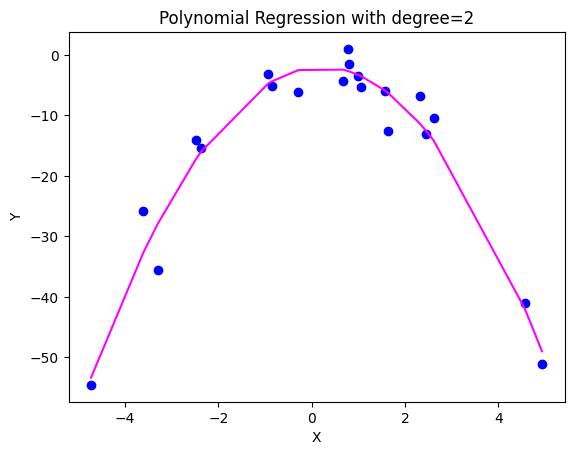

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import operator

# Step 1: Create Dummy Data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + np.random.normal(-3, 3, 20)

# Reshaping for the model
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Step 2: Polynomial Transformation
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# evaluate model
print(f"MSE:", mean_squared_error(y, y_poly_pred))
print(f"R2:", r2_score(y, y_poly_pred))
print(f"MAE:", mean_absolute_error(y, y_poly_pred))
print(f"MAPE:", mean_absolute_percentage_error(y, y_poly_pred))

# Step 4: Plotting the results
plt.scatter(x, y, color='blue')
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sorted_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='magenta')
plt.title('Polynomial Regression with degree=2')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#Ridge Regression (L2 regularization) to prevent overfiting

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np

# Example data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# Target values
y = np.dot(X, np.array([1, 2])) + 3

# Linear regression
lr = LinearRegression()
lr.fit(X, y)

print("Coefficients",lr.coef_)

print("Intercept",lr.intercept_)

Coefficients [1. 2.]
Intercept 3.0000000000000018


In [ ]:
from sklearn.linear_model import Ridge
# Example data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# Target values
y = np.dot(X, np.array([1, 2])) + 3

# Linear regression
ridge_regression = Ridge(alpha=0.5)#must be >0 it add panality
ridge_regression.fit(X, y)

print("Coefficients",ridge_regression.coef_)

print("Intercept",ridge_regression.intercept_)

Coefficients [0.90909091 1.63636364]
Intercept 3.8636363636363633


##Comparing simple linear and Ridge Regression

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the data set
df = sns.load_dataset('diamonds')

x=df.drop('price',axis=1)
y=df['price']

numeric_features=['carat','depth','table','x','y','z']
categorical_features=['cut','color','clarity']
# preprocess the data
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_features),
        ('cat',OneHotEncoder(),categorical_features)
    ]
)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

lr_pipeline=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('regressor',LinearRegression())
    ]

)

ridge_pipeline=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('regressor',Ridge(alpha=0.5))
    ]

)


# Train and evaluate Linear Regression
lr_pipeline.fit(x_train, y_train)
lr_pred = lr_pipeline.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mape = mean_absolute_percentage_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)


# Train and evaluate Ridge Regression
ridge_pipeline.fit(x_train, y_train)
ridge_pred = ridge_pipeline.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridhe_r2 = r2_score(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mape = mean_absolute_percentage_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

print("Linear Regression MSE:", lr_mse)
print("Ridge Regression MSE:", ridge_mse)
print(f"------------------------")

print("Linear Regression R2:", lr_r2)
print("Ridge Regression R2:", ridhe_r2)
print(f"------------------------")
print("Linear Regression MAE:", lr_mae)
print("Ridge Regression MAE:", ridge_mae)
print(f"------------------------")
print("Linear Regression MAPE:", lr_mape)
print("Ridge Regression MAPE:", ridge_mape)
print(f"------------------------")
print("Linear Regression RMSE:", lr_rmse)
print("Ridge Regression RMSE:", ridge_rmse)


Linear Regression MSE: 1288705.4778516744
Ridge Regression MSE: 1288691.2489788407
------------------------
Linear Regression R2: 0.9189331350419387
Ridge Regression R2: 0.9189340301185349
------------------------
Linear Regression MAE: 737.1513665933275
Ridge Regression MAE: 737.1455056792134
------------------------
Linear Regression MAPE: 0.39529335164943247
Ridge Regression MAPE: 0.39525103728552524
------------------------
Linear Regression RMSE: 1135.2116445190625
Ridge Regression RMSE: 1135.2053774444696


#Lasso Regression (L1 regularization)


Lasso Regression, which stands for `Least Absolute Shrinkage and Selection Operator`, is a type of linear regression that uses shrinkage. Shrinkage here means that the data values are shrunk towards a central point, like the mean. The lasso technique encourages simple, sparse models (i.e., models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.datasets import make_regression


# generate some regresssion data
x,y=make_regression(n_samples=1000,n_features=15,noise=0.1,random_state=42)
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Lasso regression object
lr = LinearRegression()
lasso = Lasso(alpha=0.2,max_iter=1000)#alpha=1 default,it using l1 panality (shrink the values)
ridge = Ridge(alpha=1.0,max_iter=1000)#alpha=1 default,it using l2 panality (resize(small) the values)

# Fit the model
lr.fit(x_train, y_train)
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

# Make predictions
y_pred_lr = lr.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)
# Evaluate the model
print("MSE of Linear Regression:", mean_squared_error(y_test, y_pred_lr))
print("MSE of Lasso:", mean_squared_error(y_test, y_pred_lasso))
print("MSE of Ridge:", mean_squared_error(y_test, y_pred_ridge))

MSE of Linear Regression: 0.011183765115093785
MSE of Lasso: 0.3847492638484584
MSE of Ridge: 0.050908661852273294


#GridSearch cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV,train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

lasso=Lasso()
param_grid={'alpha':np.arange(1,10,0.1)}

#Use grid search to find the best value for alpha
lasso_cross_validation=GridSearchCV(lasso,param_grid,cv=10)

lasso_cross_validation.fit(x,y)

print("Best alpha:",lasso_cross_validation.best_params_)
print("Best score:",lasso_cross_validation.best_score_)

# Create a Ridge regression object
ridge = Ridge()

# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.01)}

# Use grid search to find the best value for alpha
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=10,
                # n_jobs=-2
                )

# Fit the model
ridge_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Best alpha: {'alpha': np.float64(1.0)}
Best score: 0.9995685234915115
Tuned Ridge Regression Parameters: {'alpha': np.float64(1.0)}
Best score is 0.9999981195099323


#RandomizedSearchCV

In [ ]:
%%time
# Fine tune alpha value using cv
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge
import numpy as np

# Create a Lasso regression object
lasso = Lasso()

# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.01)}

# Use grid search to find the best value for alpha
lasso_cv = RandomizedSearchCV(lasso, param_grid, cv=10,
            n_jobs=-2
            )

# Fit the model
lasso_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_))
print("Best score is {}".format(lasso_cv.best_score_))

# Create a Ridge regression object
ridge = Ridge()

# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.01)}

# Use grid search to find the best value for alpha
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=10,
                n_jobs=-2 #cpu
                )

# Fit the model
ridge_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Lasso Regression Parameters: {'alpha': np.float64(1.01)}
Best score is 0.9995598578219005
Tuned Ridge Regression Parameters: {'alpha': np.float64(1.12)}
Best score is 0.9999977462011541
CPU times: user 449 ms, sys: 0 ns, total: 449 ms
Wall time: 453 ms


#Classification

##LogisticRegression

Accuracy Score:  0.8100558659217877
Recall Score:  0.7432432432432432
Precision Score:  0.7857142857142857
F1 Score:  0.7638888888888888
Confusion Matrix: 
 [[90 15]
 [19 55]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Text(70.72222222222221, 0.5, 'Actual')

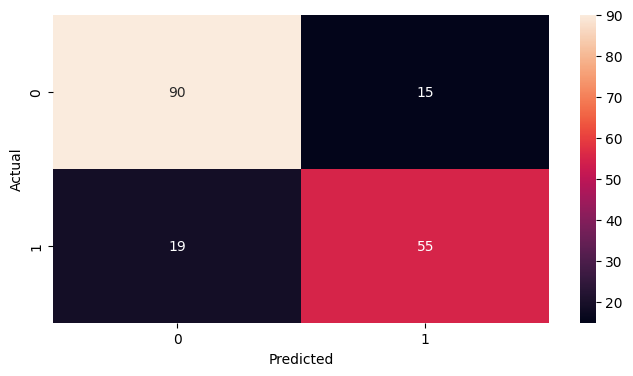

In [ ]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


# data import
df = sns.load_dataset('titanic')


# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# pre prcoess the data
# remove the deck column
df.drop(['class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)
# impute missing values in age and fare
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
# impute missing values in embark and embarked town

df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# encode the categorical variables using for loop where object and categoy datatypes are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])


# X and y column
X = df.drop('survived', axis=1)
y = df['survived']


# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# model call
model = LogisticRegression()

# train the model
model.fit(X_train, y_train)


# predict the values
y_pred = model.predict(X_test)


# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

# plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')



##K-nearst Neighbors

KNN is a supervised machine learning algorithm that can be used to solve both classification and regression problems.

It is a non-parametric, lazy learning algorithm. Non-parametric means that it does not make any assumptions on the underlying data distribution. Lazy learning means that it does not require any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier.

KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'Actual')

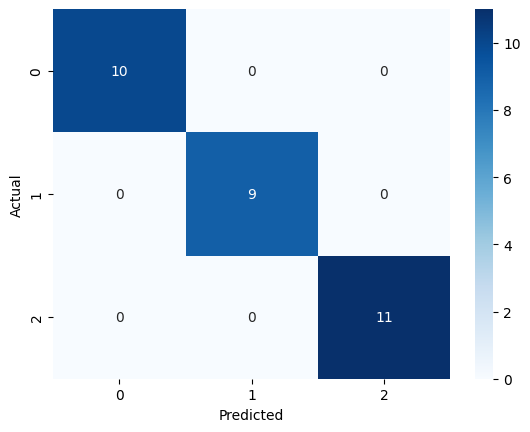

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix


# load the dataset
df = sns.load_dataset('iris')


# split the data into X and y
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
model = KNeighborsClassifier(n_neighbors=11)
# fit the model on the training data
model.fit(X_train, y_train)
# predict the species for the test data
y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##KNN for Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

# Reggression problem on tips dataset
# load the dataset
tips = sns.load_dataset('tips')

# split the data into x and y
x = tips.drop('tip', axis=1)
y = tips['tip']


le=LabelEncoder()
for col in x.columns:
    if x[col].dtype=='ojbect' or x[col].dtype=='category':
        x[col]=le.fit_transform(x[col])


X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

model=KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)
"""n_neighbors=5 means it will measure distance upto 5 neaighbors using Euclidean
    for regression: it will use median() of all the values
    for classification: it will use mode()"""

model.fit(X_train,y_train)
y_pred=model.predict(X_test)


print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.8382265306122448
R2 Score: 0.3294034029001649
RMSE: 0.9155471209130881


In [ ]:
x

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4
...,...,...,...,...,...,...
239,29.03,1,0,1,0,3
240,27.18,0,1,1,0,2
241,22.67,1,1,1,0,2
242,17.82,1,0,1,0,2


In [ ]:
model.predict([[48,1,0,1,1,3]])

array([6.346])

---

#Support Vector Mechines

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



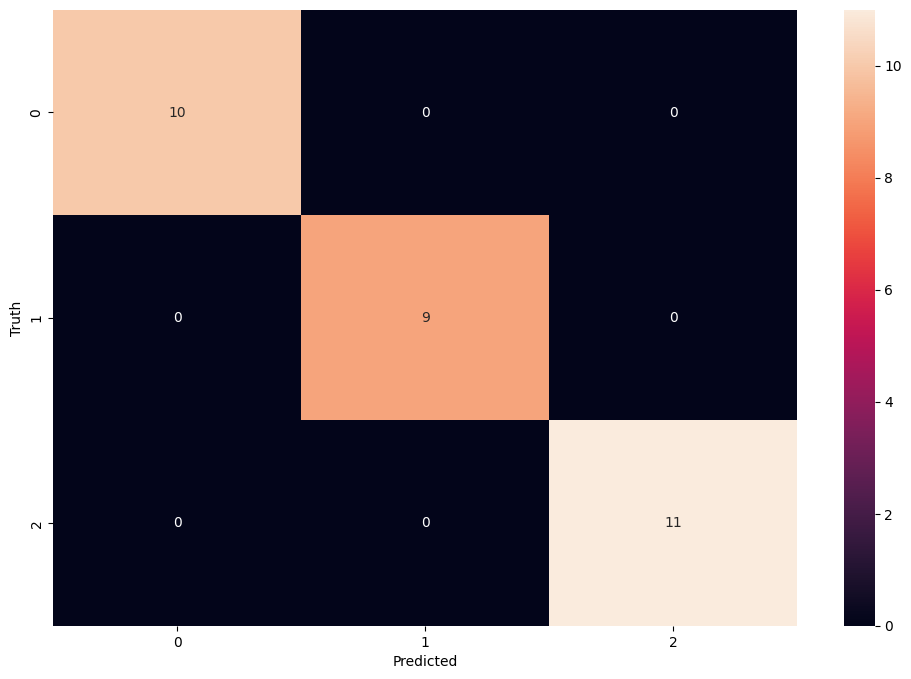

In [ ]:
from sklearn.svm import SVC


# load the dataset
df = sns.load_dataset('iris')


# split the data into X and y
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
model = SVC(kernel='rbf')
# fit the model on the training data
model.fit(X_train, y_train)
# predict the species for the test data
y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

##SVM Regression

In [ ]:
%%time

import numpy as np
import seaborn as sns
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# load the data
df = sns.load_dataset('diamonds')
df = df.sample(frac=0.2, random_state=42)

# Select features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Convert categorical variables to numerical variables
label_encoders = {}
for col in X.select_dtypes(include='category').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

# Initialize and train the SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')
# RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 13396005.286456719
R2 Score: 0.1692975856528134
Mean Absolute Error: 1995.5978850983934
Mean Absolute Percentage Error: 0.64279249965329
Root Mean Squared Error: 3660.0553665835055
CPU times: user 5.16 s, sys: 413 ms, total: 5.58 s
Wall time: 5.55 s


#DecisionTree

Decision Tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both continuous as well as categorical output variables.

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome

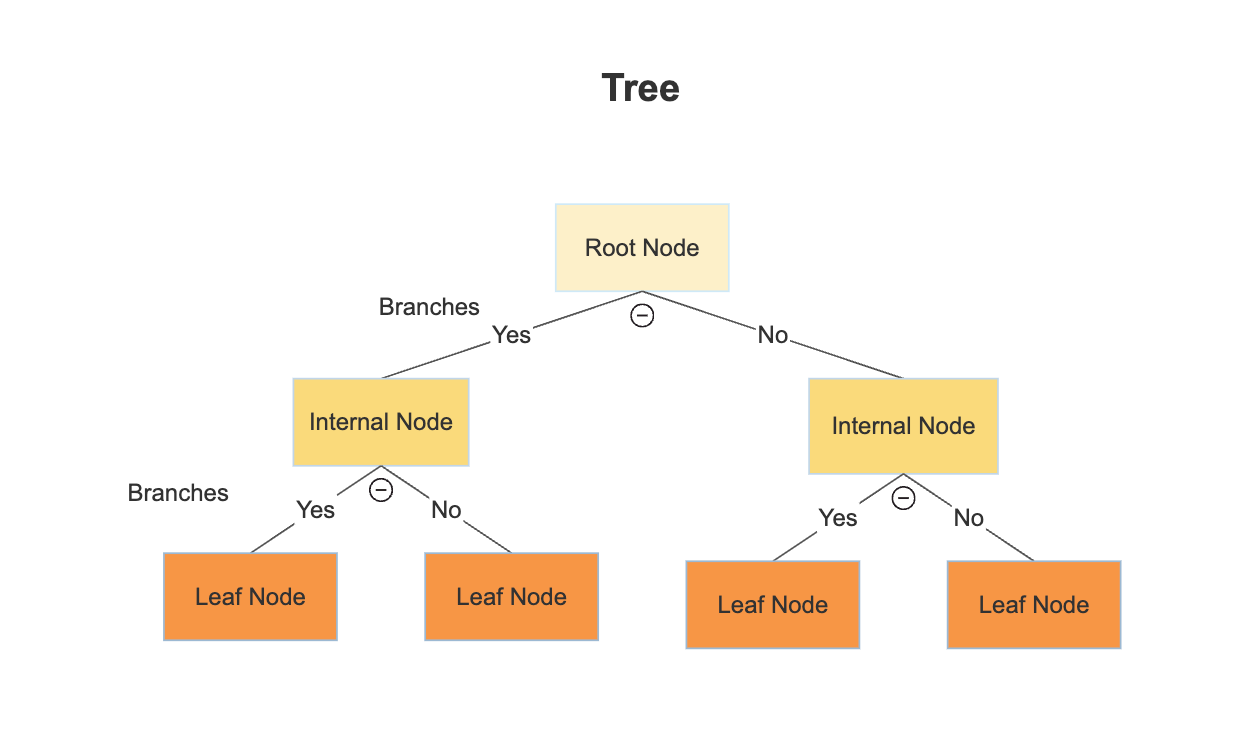

##DecisionTreeClassifier

[[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



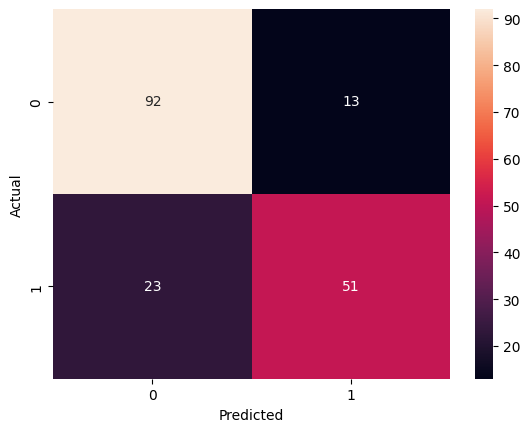

In [ ]:

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# load the dataset
df = sns.load_dataset('titanic')

df.drop(['class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)

# imput missing values for age and fare
imputer=SimpleImputer(strategy='median')
df[['age','fare']]=imputer.fit_transform(df[['age','fare']])

# imput missing values for embarked
imputer=SimpleImputer(strategy='most_frequent')
df[['embarked']]=imputer.fit_transform(df[['embarked']])

le=LabelEncoder()
for col in df.select_dtypes(include=['object','category']):
    df[col]=le.fit_transform(df[col])

# split the data into X and y
X = df.drop(['survived'], axis=1)
y = df['survived']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=3)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


# plot
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()









In [ ]:
# save the decision tree classifier
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='Decision_Tree.dot', feature_names=X.columns, filled=True, rounded=True)

##DecisionTreeRegressor

#RandomForest Algorithm

##RandomForestClassifier

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# load the data
df = sns.load_dataset('tips')

# encode features which are categorical or object using for loop
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = le.fit_transform(df[i])

# split the data into X and y for classification
X = df.drop('sex', axis = 1)
y = df['sex']
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# create, train and predict the mode
model_cl=RandomForestClassifier(n_estimators=1000,random_state=42)

model_cl.fit(X_train, y_train)
y_pred = model_cl.predict(X_test)

#evaluate the model
print('accuracy score: ', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

accuracy score:  0.6122448979591837
confusion matrix:
 [[ 7 12]
 [ 7 23]]
classification report:
               precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.66      0.77      0.71        30

    accuracy                           0.61        49
   macro avg       0.58      0.57      0.57        49
weighted avg       0.60      0.61      0.60        49



##RandomForestRegressor

In [ ]:
# USe random Forest for Regression task
X = df.drop('tip', axis = 1)
y = df['tip']

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#create, train and predict the model
model_reg = RandomForestRegressor(n_estimators=500, random_state=42)
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)

# evaluate the model
print('mean squared error: ', mean_squared_error(y_test, y_pred))
print('mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

mean squared error:  0.9340836673959151
mean absolute error:  0.7683338775510192
r2 score:  0.25271593550646254
root mean squared error:  0.9664800398331644


#Comparison of Individual, Bagging and Boosting Algorithms

##Bagging Algorithem

In [ ]:
!pip install -q numpy

Accuracy score:  0.7155172413793104
Precision score:  0.7155172413793104
Recall score:  0.7155172413793104
F1 score:  0.7155172413793104
Confusion matrix: 
 [[ 286   34    3    6    6]
 [  29  695   23   32  225]
 [   4   28 3405  324  531]
 [   8   54  337 2029  347]
 [   7  242  478  351 1304]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       335
           1       0.66      0.69      0.68      1004
           2       0.80      0.79      0.80      4292
           3       0.74      0.73      0.74      2775
           4       0.54      0.55      0.54      2382

    accuracy                           0.72     10788
   macro avg       0.72      0.72      0.72     10788
weighted avg       0.72      0.72      0.72     10788



Text(95.72222222222221, 0.5, 'Actual')

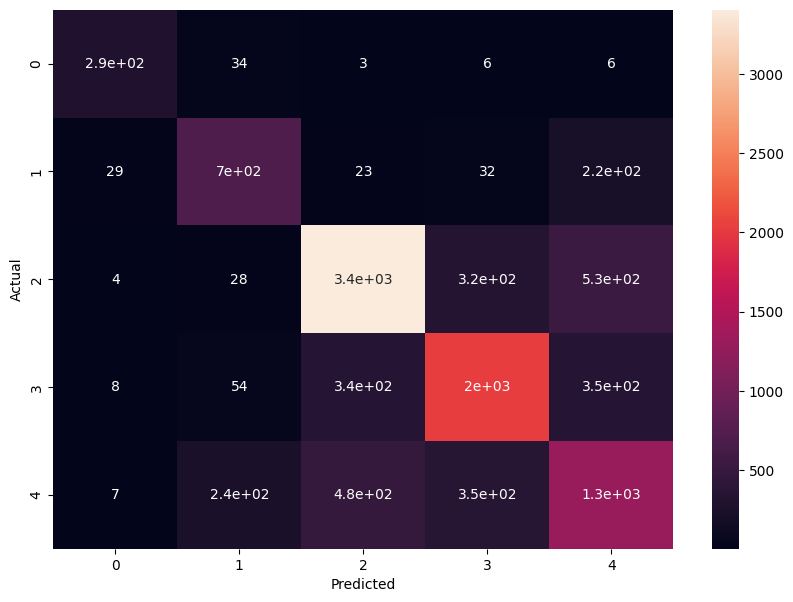

In [ ]:

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# import the data
df = sns.load_dataset('diamonds')

# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# predict the test data
y_pred = dt.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))
# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [ ]:

# feature importance
feature_importance = dt.get_feature_importance(prettified=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_importance)
plt.title('Feature Importance')
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'get_feature_importance'

Accuracy score:  0.7867074527252503
Precision score:  0.7867074527252503
Recall score:  0.7867074527252503
F1 score:  0.7867074527252503
Confusion matrix: 
 [[ 301   21    3    7    3]
 [  22  709   23   42  208]
 [   1   12 3933  167  179]
 [   1   13  309 2259  193]
 [   3  152  492  450 1285]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.78      0.71      0.74      1004
           2       0.83      0.92      0.87      4292
           3       0.77      0.81      0.79      2775
           4       0.69      0.54      0.60      2382

    accuracy                           0.79     10788
   macro avg       0.80      0.77      0.78     10788
weighted avg       0.78      0.79      0.78     10788



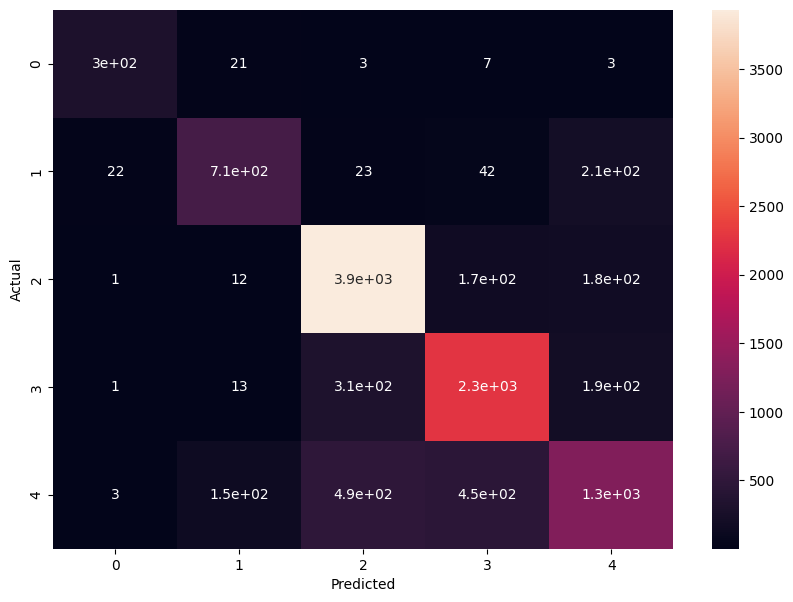

CPU times: user 16.6 s, sys: 199 ms, total: 16.8 s
Wall time: 25.2 s


In [ ]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Boosting XGBoost

Accuracy score:  0.8056173526140156
Precision score:  0.8056173526140156
Recall score:  0.8056173526140156
F1 score:  0.8056173526140156
Confusion matrix: 
 [[ 303   19    3    6    4]
 [  23  714   14   20  233]
 [   1   11 3948  164  168]
 [   1    7  300 2274  193]
 [   3  137  501  289 1452]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.80      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.83      0.82      0.82      2775
           4       0.71      0.61      0.66      2382

    accuracy                           0.81     10788
   macro avg       0.82      0.79      0.80     10788
weighted avg       0.80      0.81      0.80     10788



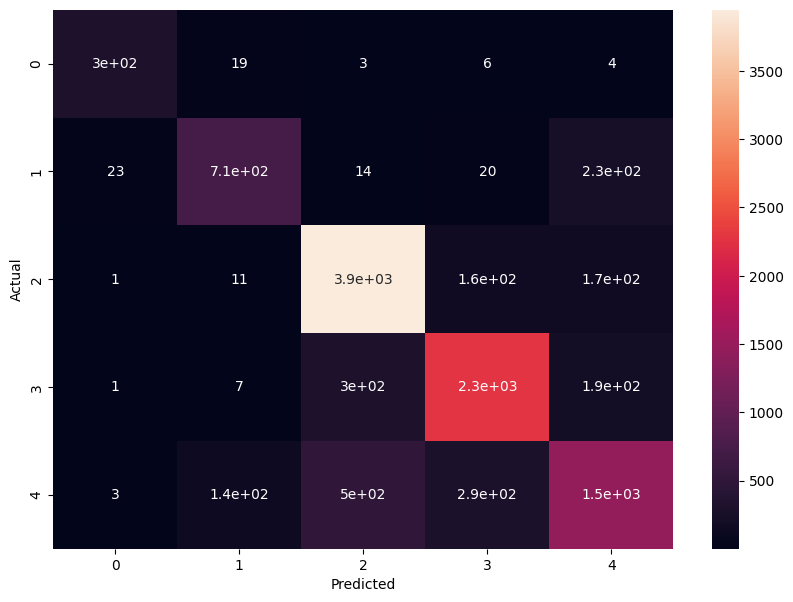

CPU times: user 11.3 s, sys: 56.1 ms, total: 11.3 s
Wall time: 11 s


In [ ]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

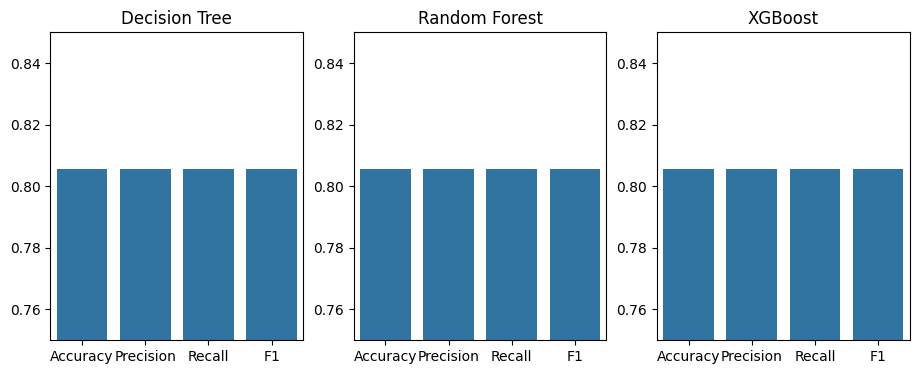

In [ ]:

# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
# Y axis limit
plt.ylim(0.75, 0.85)
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
# Y axis limit
plt.ylim(0.75, 0.85)
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# Y axis limit
plt.ylim(0.75, 0.85)
# plt.tight_layout()
plt.show()

#CatBoost Algorithm

In [ ]:
!python3 -m venv my_catboost_env
!source my_catboost_env/bin/activate  # Activate the environment

Error: Command '['/content/my_catboost_env/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: my_catboost_env/bin/activate: No such file or directory


In [ ]:
# !pip install --upgrade numpy
!pip install  catboost
import numpy
import catboost
print(f"NumPy version: {numpy.__version__}")
print(f"CatBoost version: {catboost.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 56.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer, KNNImputer

# load the dataset
df = sns.load_dataset('titanic')

df.drop(['class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)

# imput missing values for age and fare
imputer=SimpleImputer(strategy='median')
df[['age','fare']]=imputer.fit_transform(df[['age','fare']])

# imput missing values for embarked
imputer=SimpleImputer(strategy='most_frequent')
df[['embarked']]=imputer.fit_transform(df[['embarked']])

le=LabelEncoder()
for col in df.select_dtypes(include=['object','category']):
    df[col]=le.fit_transform(df[col])

# split the data into X and y
X = df.drop(['survived'], axis=1)
y = df['survived']


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=1
)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


# plot
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



ModuleNotFoundError: No module named 'catboost'

Freature_importance is only possible in catboost algorithms

In [ ]:

# feature importance
feature_importance = model.get_feature_importance(prettified=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_importance)
plt.title('Feature Importance')
plt.show()

#Naive Bayes Algorithm

In [ ]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# load the dataset
df = sns.load_dataset('iris')
print(df.head())
X = df.drop('species', axis=1)
y = df['species']

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# model initialize
gnb = GaussianNB() #Mulitclass classification

# train the model
gnb.fit(X_train, y_train)

# predict the test data
y_pred = gnb.predict(X_test)

# evaluate the model
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Accuracy Score:  1.0
Confusion Matrix: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:

# model initialize
mnb = MultinomialNB()

# train the model
mnb.fit(X_train, y_train)

# predict the test data
y_pred = mnb.predict(X_test)

# evaluate the model
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.9736842105263158
Confusion Matrix: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
# model initialize
bnb = BernoulliNB()

# train the model
bnb.fit(X_train, y_train)

# predict the test data
y_pred = bnb.predict(X_test)

# evaluate the model
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.2894736842105263
Confusion Matrix: 
 [[ 0 15  0]
 [ 0 11  0]
 [ 0 12  0]]
Classification Report: 
               precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        15
  versicolor       0.29      1.00      0.45        11
   virginica       0.00      0.00      0.00        12

    accuracy                           0.29        38
   macro avg       0.10      0.33      0.15        38
weighted avg       0.08      0.29      0.13        38



#Cross Validation


**Types of cross-validations:**

1. k-fold cross-validation
2. train-test split
3. leave-one-out cross-validation (LOOCV)
4. stratified cross-validation
5. Times series cross-validation
6. Group cross-validation

##k-fold cross-validation

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,train_test_split

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# load the dataset
df = sns.load_dataset('iris')
# print(df.head())
X = df.drop('species', axis=1)
y = df['species']

# train test split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scores=cross_val_score(GaussianNB(),X,y,cv=5,scoring='accuracy')

print(f"Scores for each fold: {scores}")
print(f"Mean of scores: {scores.mean()}")
print(f"Standard deviation of scores: {scores.std()}")

Scores for each fold: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean of scores: 0.9533333333333334
Standard deviation of scores: 0.02666666666666666


###How to plot k-fold CV?

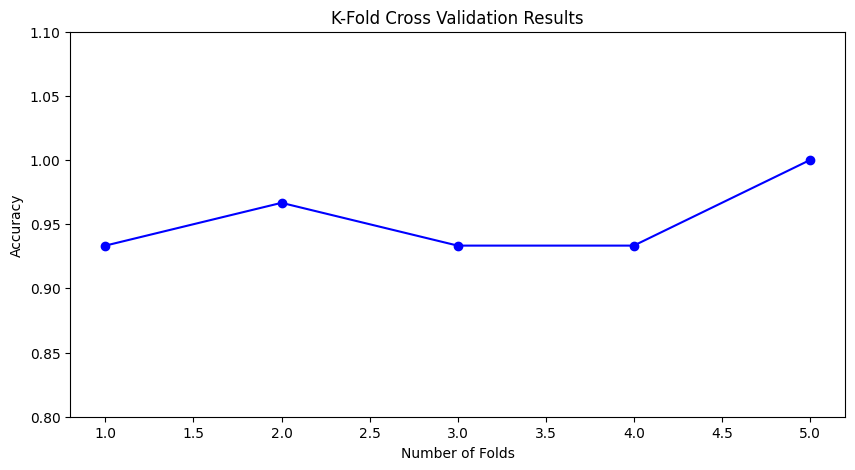

In [ ]:
#let's plot the results
plt.figure(figsize=(10,5))
plt.plot(range(1,6),scores,color='blue',linestyle='-',marker='o')
plt.title('K-Fold Cross Validation Results')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.ylim(0.8,1.1)
plt.show()

##train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))


1.0


#Hyperparameter tuning of Machine Learning Models

##Techniques for Hyperparameter Tuning

**There are several techniques for hyperparameter tuning. Some of the most popular techniques in Scikit-learn are:**

1. Grid Search
2. Random Search
3. Successive Halving
   - Halving Grid Search
   - Halving Random Search

#Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.ensemble import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score

tips=sns.load_dataset('tips')

oe=OrdinalEncoder()
tips_encoded=oe.fit_transform(tips)
tips_encoded=pd.DataFrame(tips_encoded,columns=tips.columns)



X=tips_encoded.drop('tip',axis=1)
y=tips_encoded['tip']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



#define the parameter grid
parameters={
    'n_estimators':[200,300],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5],
    # 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]

}


grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=parameters,
                           cv=5,
                        #    n_jobs=-1
                           )

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Predict on test set
best_rf = grid_search.best_estimator_
best_params=grid_search.best_params_

model=RandomForestRegressor(best_params).fit(x_train,y_train)
y_pred = model.predict(x_test)

print(f"R2 score: {r2_score(y_test, y_pred)}")

Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.35926921127278455


InvalidParameterError: The 'n_estimators' parameter of RandomForestRegressor must be an int in the range [1, inf). Got {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300} instead.

#RandomSearchCV

In [ ]:
%%time
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score,mean_squared_error

tips=sns.load_dataset('tips')
# Preprocess the Data
# Convert categorical variables using one-hot encoding
tips_encoded = pd.get_dummies(tips, drop_first=True)

# Define features and target variable
x = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning with GridSearchCV
# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    # n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

# Best Parameters and Evaluation
print(f"Best Parameters: {random_search.best_params_}")

# Predict on test set
best_rf = random_search.best_estimator_

y_pred = best_rf.predict(x_test)

# Calculate Mean Squared Error
mse = r2_score(y_test, y_pred)
print(f"r2 score {mse:.2f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 30}
r2 score 0.22
Mean Squared Error on Test Set: 0.97
CPU times: user 13.6 s, sys: 56.4 ms, total: 13.7 s
Wall time: 15.7 s


#Selecting the best model with Best hyperparameters

##For Regression Tasks

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import (
    OrdinalEncoder,
    OneHotEncoder,
    LabelEncoder,
    MinMaxScaler,
    StandardScaler
    )

from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression,
                                  Ridge,
                                  Lasso)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor,
                              AdaBoostRegressor,
                              )
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    root_mean_squared_error
)



###Best Model selection based on MSE

In [ ]:
# load dataset
df = sns.load_dataset('tips')

# select features and variables
X = df.drop('tip', axis=1)
y = df['tip']
le=LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['smoker'] = le.fit_transform(X['smoker'])
X['day'] = le.fit_transform(X['day'])
X['time'] = le.fit_transform(X['time'])
# split the data into train and test data with 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
          'LinearRegression' : LinearRegression(),
          'SVR' : SVR(),
          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor(),
          'XGBRegressor' : XGBRegressor()
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)

    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = mean_squared_error(y_test, y_pred)
    model_scores.append((name, metric))

    # print the performing metric
    # print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    # print(name, 'R2: ', r2_score(y_test, y_pred))
    # print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    # print('\n')

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=False)


for model in sorted_models:
    print('Mean Squared error for', f"{model[0]} is {model[1]: .2f}")

Mean Squared error for SVR is  0.54
Mean Squared error for LinearRegression is  0.69
Mean Squared error for XGBRegressor is  0.74
Mean Squared error for GradientBoostingRegressor is  0.80
Mean Squared error for KNeighborsRegressor is  0.84
Mean Squared error for RandomForestRegressor is  0.97
Mean Squared error for DecisionTreeRegressor is  1.54


###Best Model selection based on R2 score

In [ ]:
# load dataset
df = sns.load_dataset('tips')

# select features and variables
X = df.drop('tip', axis=1)
y = df['tip']

le=LabelEncoder()

X['sex'] = le.fit_transform(X['sex'])
X['smoker'] = le.fit_transform(X['smoker'])
X['day'] = le.fit_transform(X['day'])
X['time'] = le.fit_transform(X['time'])
# split the data into train and test data with 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
          'LinearRegression' : LinearRegression(),
          'SVR' : SVR(),
          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor(),
          'XGBRegressor' : XGBRegressor()
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)

    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = r2_score(y_test, y_pred)
    model_scores.append((name, metric))

    # print the performing metric
    # print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    # print(name, 'R2: ', r2_score(y_test, y_pred))
    # print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    # print('\n')

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=True)


for model in sorted_models:
    print('R2 error for', f"{model[0]} is {model[1]: .2f}")

R2 error for SVR is  0.57
R2 error for LinearRegression is  0.44
R2 error for XGBRegressor is  0.41
R2 error for GradientBoostingRegressor is  0.36
R2 error for KNeighborsRegressor is  0.33
R2 error for RandomForestRegressor is  0.24
R2 error for DecisionTreeRegressor is  0.08


###Best Model selection based on MAE

In [ ]:
# load dataset
df = sns.load_dataset('tips')

# select features and variables
X = df.drop('tip', axis=1)
y = df['tip']
le=LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['smoker'] = le.fit_transform(X['smoker'])
X['day'] = le.fit_transform(X['day'])
X['time'] = le.fit_transform(X['time'])
# split the data into train and test data with 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
          'LinearRegression' : LinearRegression(),
          'SVR' : SVR(),
          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor(),
          'XGBRegressor' : XGBRegressor()
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)

    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = mean_absolute_error(y_test, y_pred)
    model_scores.append((name, metric))

    # print the performing metric
    # print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    # print(name, 'R2: ', r2_score(y_test, y_pred))
    # print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    # print('\n')

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=False)


for model in sorted_models:
    print('Mean Absolute error for', f"{model[0]} is {model[1]: .2f}")

Mean Absolute error for SVR is  0.57
Mean Absolute error for LinearRegression is  0.67
Mean Absolute error for XGBRegressor is  0.67
Mean Absolute error for KNeighborsRegressor is  0.73
Mean Absolute error for GradientBoostingRegressor is  0.73
Mean Absolute error for RandomForestRegressor is  0.76
Mean Absolute error for DecisionTreeRegressor is  0.90


###Hyper-parameter tuning

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
models={
    'LinearRegression':(LinearRegression(),{}),
    # 'Ridge':Ridge(),
    # 'Lasso':Lasso(),
    'SVR':(SVR(),{'kernel':['rbf','poly','sigmoid']}),
    'DecisionTreeRegressor':(DecisionTreeRegressor(),{'max_depth':[None,5,10]}),
    'RandomForestRegressor':(RandomForestRegressor(),{'n_estimators':[10,100]}),
    'GradientBoostingRegressor':(GradientBoostingRegressor(),{'n_estimators':[10,100]}),
    'XGBRegressor':(XGBRegressor(),{'n_estimators':[10,100]}),
    'KNeighborsRegressor':(KNeighborsRegressor(),{'n_neighbors':[5,10]})
}

for name,(model,params) in models.items():

    pipeline=GridSearchCV(model,params,cv=5)
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)

    print(f'{name} MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'{name} R2: {r2_score(y_test,y_pred)}')
    print(f'{name} MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'{name} Best Parameters: {pipeline.best_params_}')
    print('==================================')

LinearRegression MSE: 0.694812968628771
LinearRegression R2: 0.4441368826121932
LinearRegression MAE: 0.6703807496461157
LinearRegression Best Parameters: {}
SVR MSE: 1.460718141299992
SVR R2: -0.1686013018011976
SVR MAE: 0.8935334948775431
SVR Best Parameters: {'kernel': 'poly'}
DecisionTreeRegressor MSE: 0.8774153020453993
DecisionTreeRegressor R2: 0.298051667053291
DecisionTreeRegressor MAE: 0.7189481629481629
DecisionTreeRegressor Best Parameters: {'max_depth': 5}
RandomForestRegressor MSE: 0.9546384693877551
RandomForestRegressor R2: 0.23627171694931326
RandomForestRegressor MAE: 0.7691224489795918
RandomForestRegressor Best Parameters: {'n_estimators': 10}
GradientBoostingRegressor MSE: 0.8106801524004932
GradientBoostingRegressor R2: 0.35144101065487676
GradientBoostingRegressor MAE: 0.7657809818712309
GradientBoostingRegressor Best Parameters: {'n_estimators': 10}
XGBRegressor MSE: 0.6624107100882575
XGBRegressor R2: 0.4700592836840687
XGBRegressor MAE: 0.6549163442728472
XGBRe

In [ ]:
%%time
# Note, ensure to give more time to run this cell
# Create a dictionaries of list of models to evaluate performance with hyperparameters
from sklearn.model_selection import RandomizedSearchCV
models = {
          'LinearRegression' : (LinearRegression(), {}),
          'SVR' : (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'epsilon': [0.1, 0.01, 0.001]}),
          'DecisionTreeRegressor' : (DecisionTreeRegressor(), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),
          'RandomForestRegressor' : (RandomForestRegressor(), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
          'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),
          'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'loss': ['ls', 'lad', 'huber', 'quantile'], 'n_estimators': [10, 100, 1000]}),
          'XGBRegressor' : (XGBRegressor(), {'n_estimators': [10, 100, 1000], 'learning_rate': [0.1, 0.01, 0.001]}),
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

for name, (model, params) in models.items():
    # create a pipline
    pipeline = RandomizedSearchCV(model, params, cv=5)

    # fit the pipeline
    pipeline.fit(X_train, y_train)

    # make prediction from each model
    y_pred = pipeline.predict(X_test)


    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LinearRegression MSE:  0.694812968628771
LinearRegression R2:  0.4441368826121932
LinearRegression MAE:  0.6703807496461157




##For Classification Tasks

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# dont show warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a dictionary of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Perform k-fold cross-validation and calculate the mean accuracy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X, y, cv=kfold)
    accuracy = np.mean(scores)
    print("Classifier:", name)
    print("Mean Accuracy:", accuracy)
    print()

Classifier: Logistic Regression
Mean Accuracy: 0.9733333333333334

Classifier: Decision Tree
Mean Accuracy: 0.9533333333333335

Classifier: Random Forest
Mean Accuracy: 0.9600000000000002

Classifier: SVM
Mean Accuracy: 0.9666666666666668

Classifier: KNN
Mean Accuracy: 0.9733333333333334



#PyCaret

In [ ]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:

# check version
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
from pycaret.datasets import get_data
index=get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [ ]:
df=get_data('juice')


,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [ ]:

!pip install -q pycaret --force-reinstall
!pip install imbalanced-learn==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.5/600.5 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install scikit-learn

In [ ]:
from pycaret.classification import *
clf1 = setup(df, target = 'Purchase', session_id=123, experiment_name='juice')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

#Inovista

#Dinensionality reduction

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
df = pd.DataFrame(data=dataset.data, columns= dataset.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
y=dataset.target

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
x=dataset.data
print(x.shape)
x

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

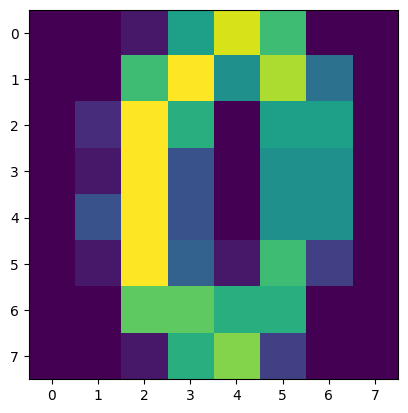

In [ ]:
plt.imshow(x[10].reshape(8,8))

In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=40)


model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(model.score(x_test,y_test))

0.9694444444444444
0.9694444444444444


#Principle Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
# pca=PCA(n_components=10)
x_pca=pca.fit_transform(x)
print(x_pca.shape)
y.shape

x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=40)


model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

(1797, 29)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9638888888888889

#Anomaly Detection

##Using Box plot

In [ ]:
!git clone 'https://github.com/MuhammadAhtishamYousaf/innoquest-AI-cohort-1.git'



Cloning into 'innoquest-AI-cohort-1'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 304 (delta 13), reused 0 (delta 0), pack-reused 259 (from 1)
Receiving objects: 100% (304/304), 133.11 MiB | 31.83 MiB/s, done.
Resolving deltas: 100% (73/73), done.
Updating files: 100% (91/91), done.


In [ ]:

pd.set_option('display.max_rows',800)
pd.set_option('display.max_columns',500)
df=pd.read_csv('/content/innoquest-AI-cohort-1/Module-2_ML-and-DL/Day_16_Handon Unsupervised Learning/datasets/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 14)

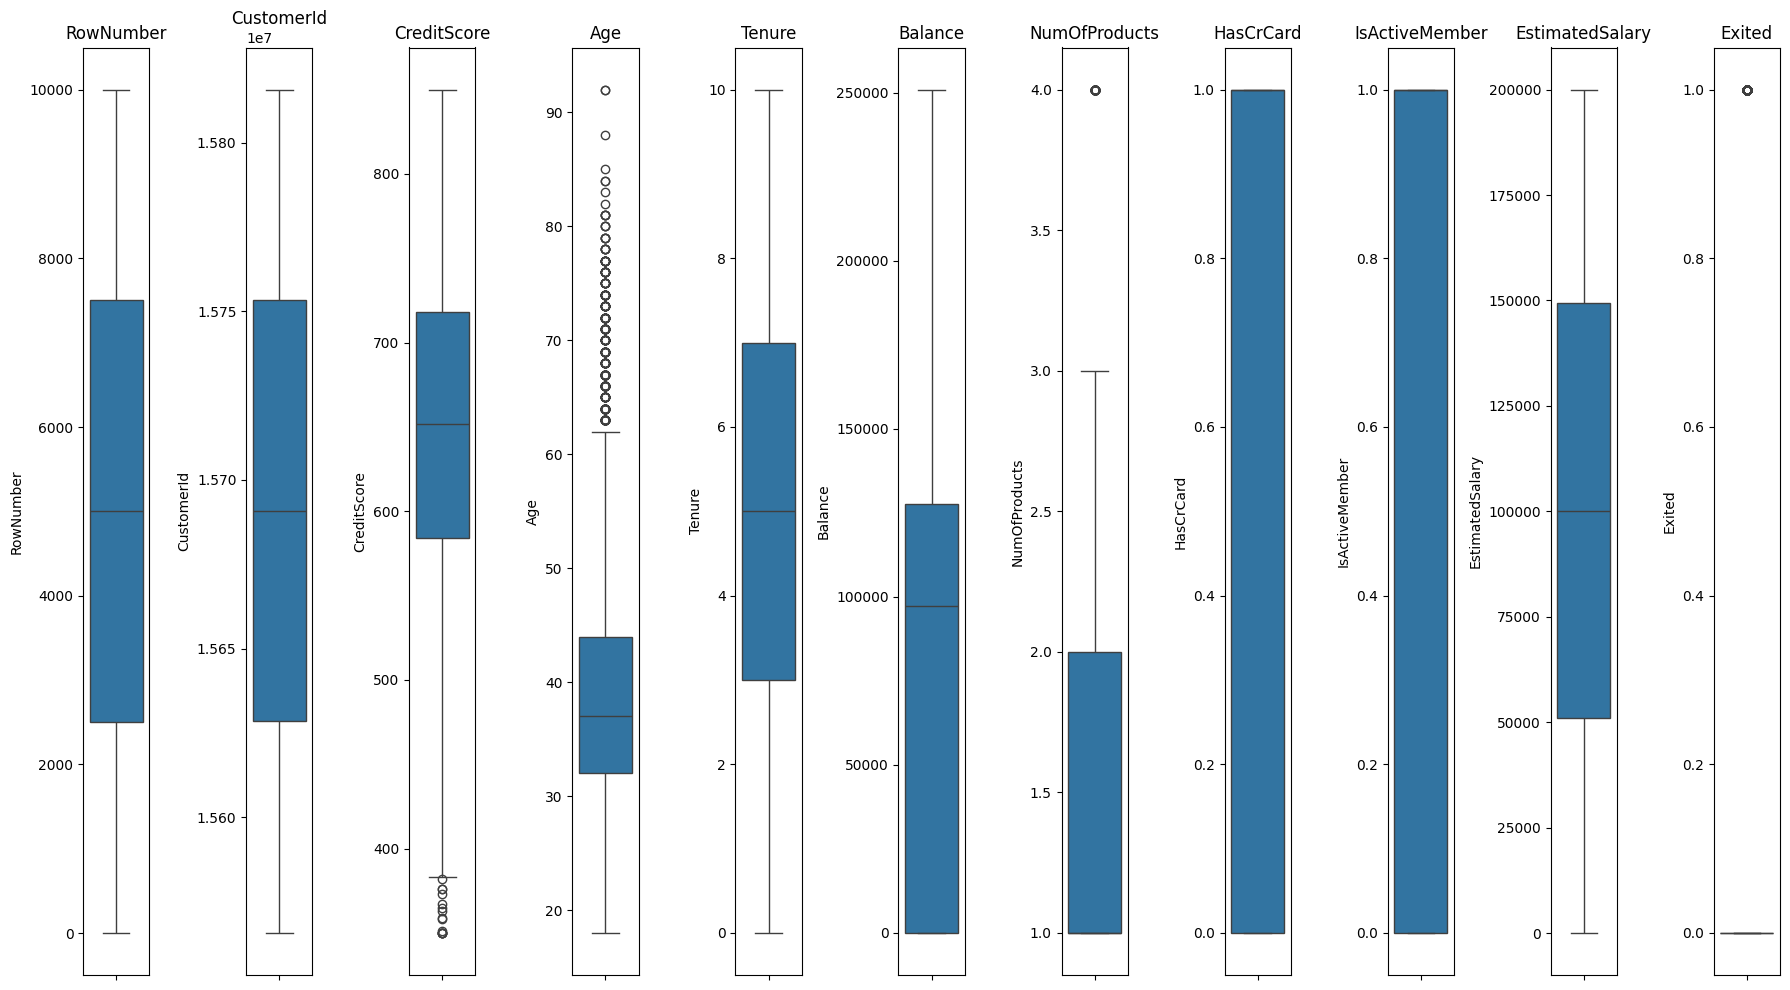

In [ ]:
numerical_columns=df.select_dtypes(include=np.number).columns


plt.figure(figsize=(18,10))

for i,col in enumerate(numerical_columns,1):
    plt.subplot(1,len(numerical_columns),i)
    sns.boxplot(data=df,y=col)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

<Axes: xlabel='Exited', ylabel='CreditScore'>

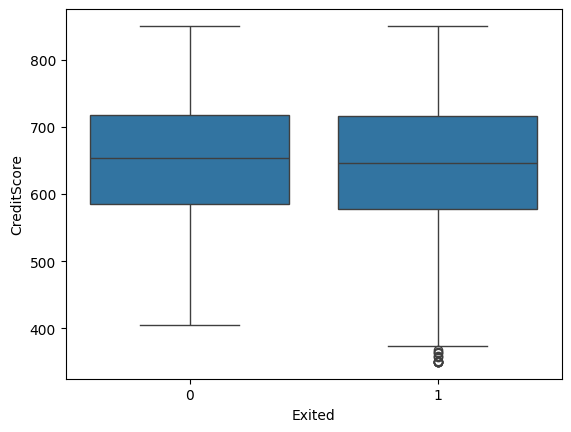

In [ ]:
sns.boxplot(df,y='CreditScore',x='Exited')

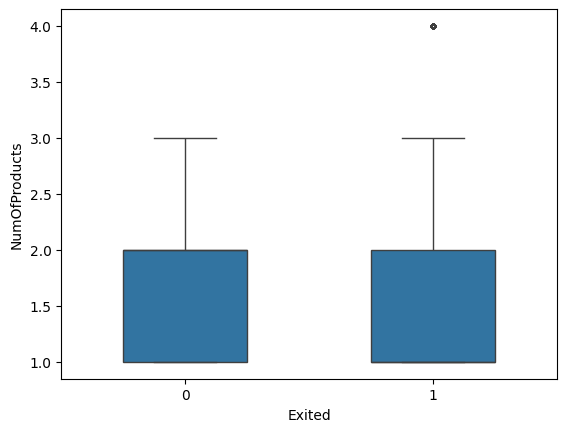

In [ ]:
sns.boxplot(data=df, width= 0.5, fliersize=3, y="NumOfProducts", x="Exited");

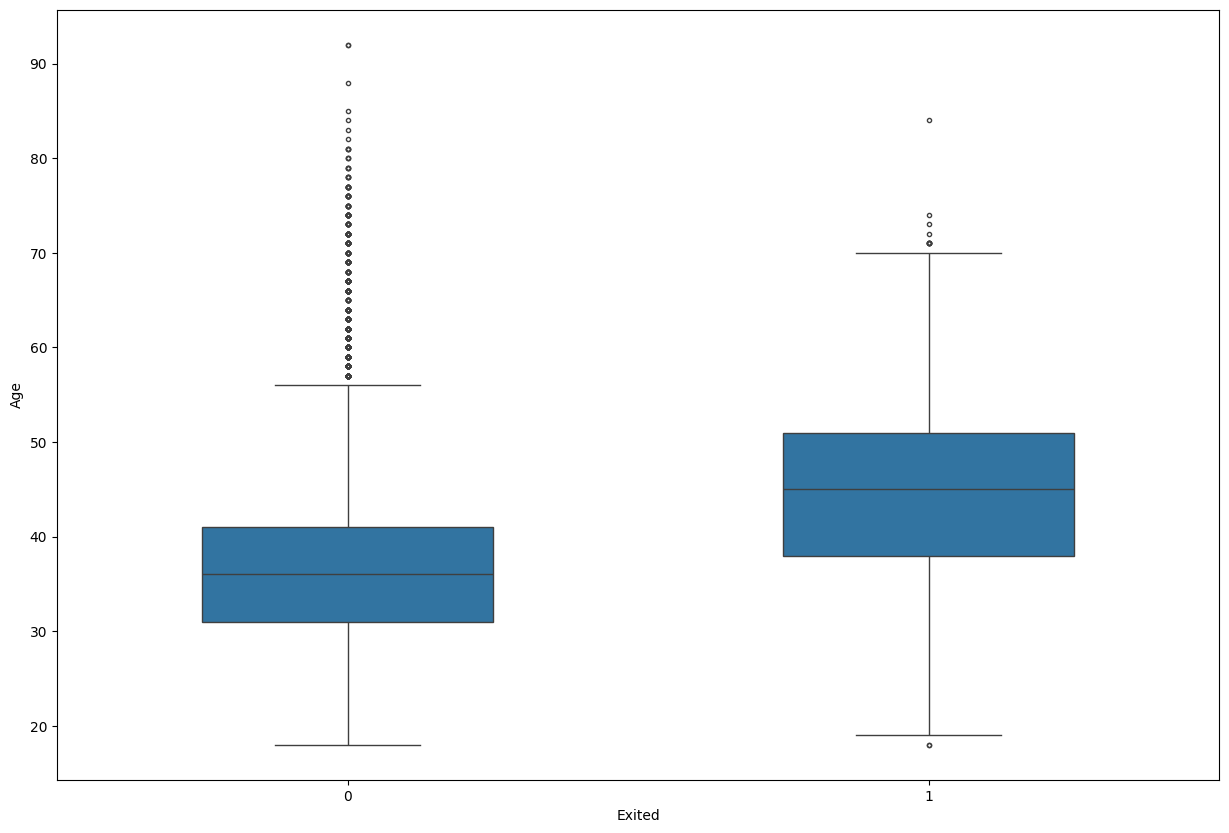

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5, ax=ax,  fliersize=3, y="Age", x="Exited");

##Using IQR

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


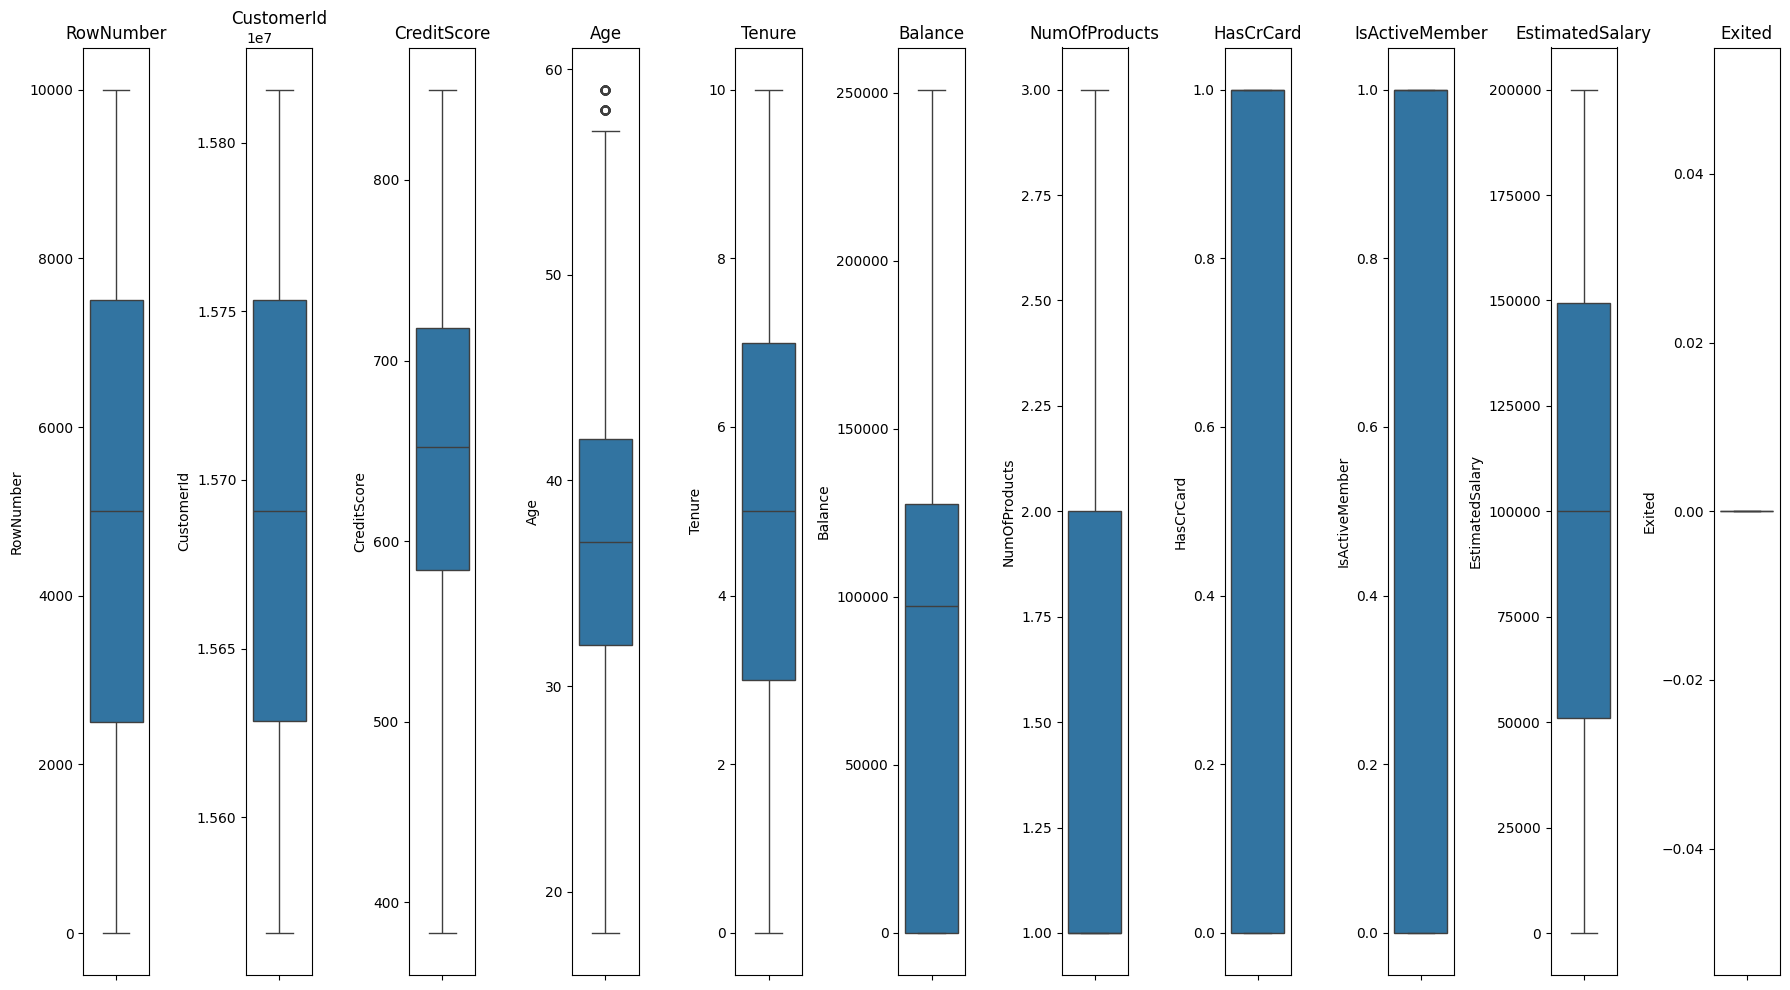

In [ ]:
def replace_anomlies_with_median(df, numerical_columns):
    for col in numerical_columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        # print(col)
        # print(q1)
        # print(q3)
        # print(iqr)
        # print(upper_limit)
        # print(lower_limit)
        # print('----------------------')
        df[col]=np.where((df[col]>upper_limit)|(df[col]<lower_limit),df[col].median(),df[col])

def show_anomalies(df, numerical_columns):
    plt.figure(figsize=(18,10))
    for i,col in enumerate(numerical_columns,1):
        plt.subplot(1,len(numerical_columns),i)
        sns.boxplot(data=df,y=col)
        plt.title(f'{col}')

    plt.tight_layout()
    plt.show()


replace_anomlies_with_median(df, numerical_columns)
show_anomalies(df, numerical_columns)


#Working with Unlabaled Data - Clustering

##K-means clustring using sk-learn

In [ ]:
from sklearn.datasets import make_blobs

x,y= make_blobs(n_samples=1000,n_features=2,centers=3)
df=pd.DataFrame(data=x,columns=['feature1','feature2'])
df

,feature1,feature2
0,-0.301269,-9.006065
1,10.071098,-8.253402
2,8.205458,-6.513385
3,9.657518,-5.518458
4,9.348620,-6.292654
...,...,...
995,9.813085,-8.508232
996,-1.965818,-8.104769
997,9.279170,-9.391877
998,-2.783461,-10.672345


<Axes: ylabel='feature2'>

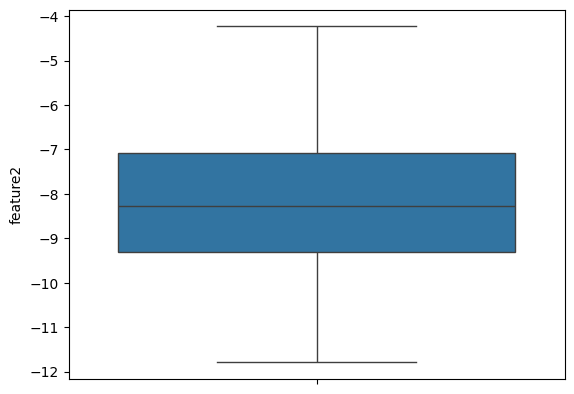

In [ ]:
sns.boxplot(df['feature2'])

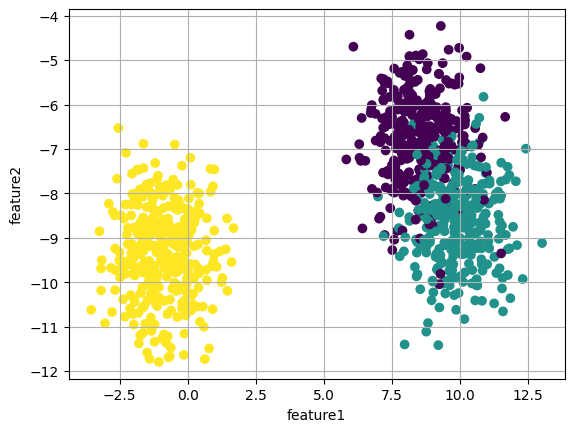

In [ ]:
np.unique(x)

plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.grid()
plt.show()

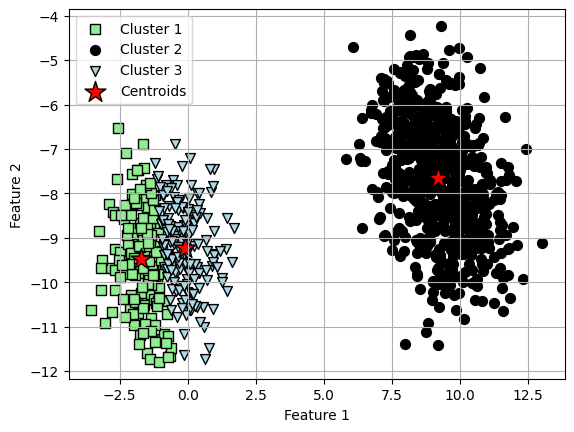

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3)

y_km=km.fit_predict(x)


#generates a scatter plot to visualize clusters and their centroids resulting from a K-Means clustering algorithm
#Selects all points from X that belong to the first cluster (y_km == 0), using the first and second features as coordinates.
plt.scatter(x[y_km == 0, 0],
            x[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(x[y_km == 1, 0],
            x[y_km == 1, 1],
            s=50, c='black',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(x[y_km == 2, 0],
            x[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')


plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()

#plt.savefig('figures/10_02.png', dpi=300)
plt.show()

In [ ]:
print(f'Inertia/Distortaion: {km.inertia_}')

Inertia/Distortaion: 2607.1121499189103


#Using the elbow method to find the optimal number of clusters

Text(0, 0.5, 'Distortion')

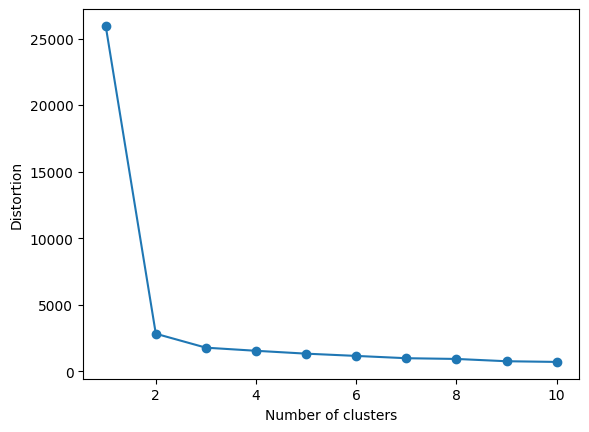

In [ ]:
distortions=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")

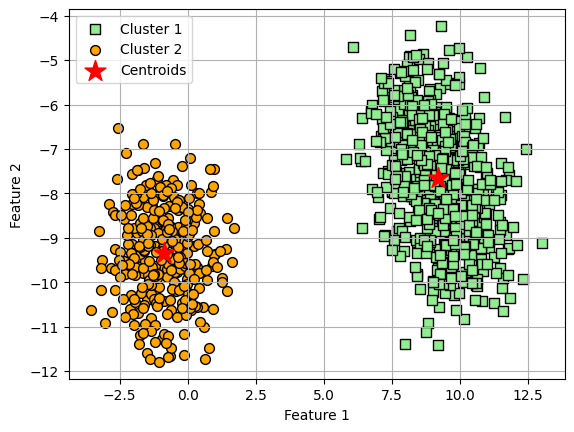

In [ ]:
km = KMeans(n_clusters=2,
            init='random',
            max_iter=300)

y_km = km.fit_predict(x)

plt.scatter(x[y_km == 0, 0],
            x[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(x[y_km == 1, 0],
            x[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.grid()
plt.show()

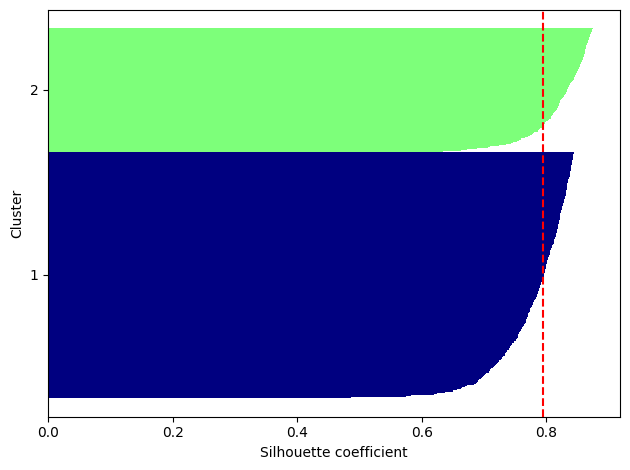

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_06.png', dpi=300)
plt.show()


#Clustring on titanic dataset KMeans

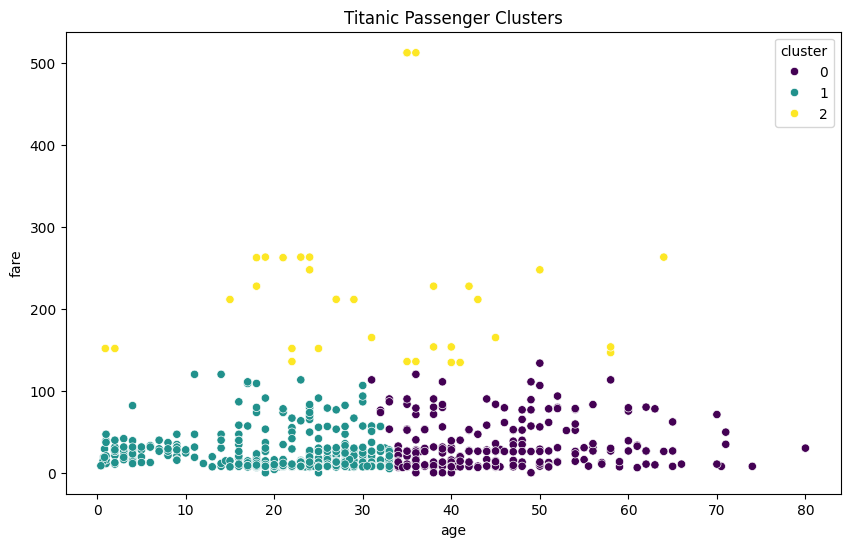

,age,fare,cluster
0,22.0,7.2500,1
1,38.0,71.2833,0
2,26.0,7.9250,1
3,35.0,53.1000,0
4,35.0,8.0500,0
...,...,...,...
885,39.0,29.1250,0
886,27.0,13.0000,1
887,19.0,30.0000,1
889,26.0,30.0000,1


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset and select relevant features
df = sns.load_dataset('titanic')
features = df[['age', 'fare']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
features['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='age', y='fare', hue='cluster', palette='viridis')
plt.title('Titanic Passenger Clusters')
plt.show()
features

In [ ]:
print(features['cluster'].value_counts())

cluster
1    441
0    240
2     33
Name: count, dtype: int64


##Cluster Metrics

###Inertia_

1. Measures how tightly grouped the points in a cluster are.

2. Lower inertia means better clustering.

In [ ]:
print(f'Inertia/Distortion: {kmeans.inertia_}')

Inertia/Distortion: 557.7438501983348


###silhouette

1. Measures how well-separated clusters are.

2. Ranges from -1 to 1 (higher is better).

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_features, features['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4594299119210342


###Elbow method choosing the best k (n_clusters)

Helps determine the optimal number of clusters by plotting inertia values.

In [ ]:
scaled_features

array([[-0.53037664, -0.51897787],
       [ 0.57183099,  0.69189675],
       [-0.25482473, -0.50621356],
       ...,
       [-0.73704057, -0.08877362],
       [-0.25482473, -0.08877362],
       [ 0.15850313, -0.50952283]])

Cluster No. :1 : Inertia: 1427.9999999999993
Cluster No. :2 : Inertia: 934.7334092391977
Cluster No. :3 : Inertia: 557.7438501983348
Cluster No. :4 : Inertia: 447.7571474061748
Cluster No. :5 : Inertia: 324.94806520648746


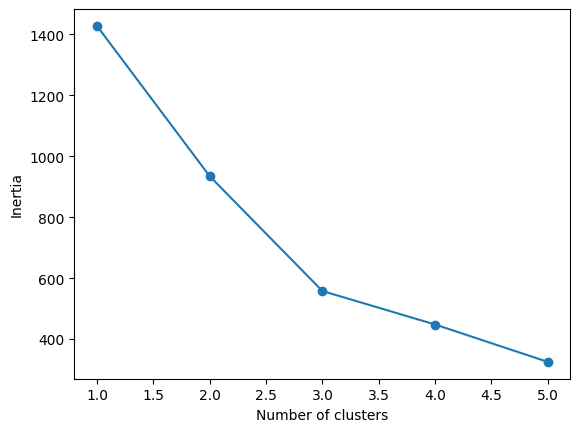

In [ ]:
inertias=[]
for k in range(1,6):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_features)
    print(f'Cluster No. :{k} : Inertia: {kmeans.inertia_}')
    inertias.append(kmeans.inertia_)

plt.plot(range(1,6),inertias,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Cluster No. :1 : Inertia: 1427.9999999999993
Cluster No. :2 : Inertia: 934.7334092391977
Cluster No. :3 : Inertia: 557.7438501983348
Cluster No. :4 : Inertia: 447.7571474061748
Cluster No. :5 : Inertia: 324.94806520648746
Cluster No. :6 : Inertia: 265.0524965639731
Cluster No. :7 : Inertia: 233.84566966420994
Cluster No. :8 : Inertia: 173.59960323736772
Cluster No. :9 : Inertia: 146.54534582952678
Cluster No. :10 : Inertia: 126.2596905844246


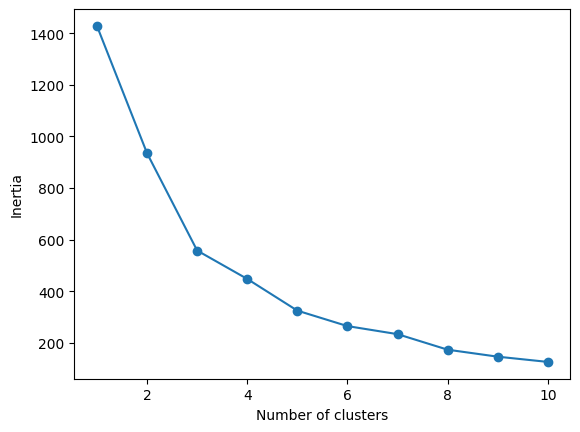

In [ ]:
inertias=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_features)
    print(f'Cluster No. :{k} : Inertia: {kmeans.inertia_}')
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11),inertias,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

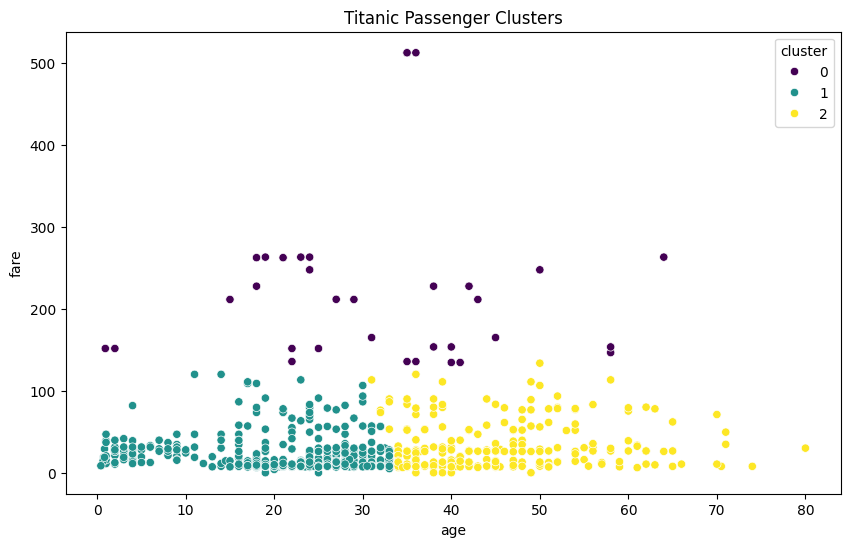

In [ ]:
# Apply K-Means Clustering with optimal k (e.g., k=3 based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
features['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='age', y='fare', hue='cluster', palette='viridis')
plt.title('Titanic Passenger Clusters')
plt.show()

**How to Predict on New Data?**

When to use `fit_transform()` vs. `fit()` and `transform()` separately:

Training Data: Use `fit_transform()` on the training data to learn the transformation parameters and apply the transformation in one step.
New/Test Data: Use `transform()` (with the pre-fitted transformer) on new or test data to apply the same transformation learned from the training data. Do not use `fit_transform()` on new data, as it would recalculate the transformation parameters based on the new data, leading to data leakage and incorrect scaling.

In [ ]:
# New passenger data
new_data = pd.DataFrame({'age': [25, 50], 'fare': [100, 200]})

# Standardize new data using the same scaler
new_scaled = scaler.transform(new_data)
# new_scaled = scaler.transform([[25,50]])

# Predict cluster for new passengers
predicted_clusters = kmeans.predict(new_scaled)
print("Predicted Clusters:", predicted_clusters)


Predicted Clusters: [1 0]


##Heirarchical Clustring

- Agglomerative (bottom-up) or divisive (top-down): Creates a hierarchy of clusters by iteratively merging or splitting clusters based on similarity.
1. Pros: Provides a visual representation of cluster relationships (dendrogram), doesn't require pre-specifying the number of clusters.
2. Cons: Can be computationally expensive for large datasets, sensitive to noise and outliers.

###Agglomerative Clustering (Bottom-Up Approach)

clusters
1    328
0    236
3     70
4     62
2     18
Name: count, dtype: int64


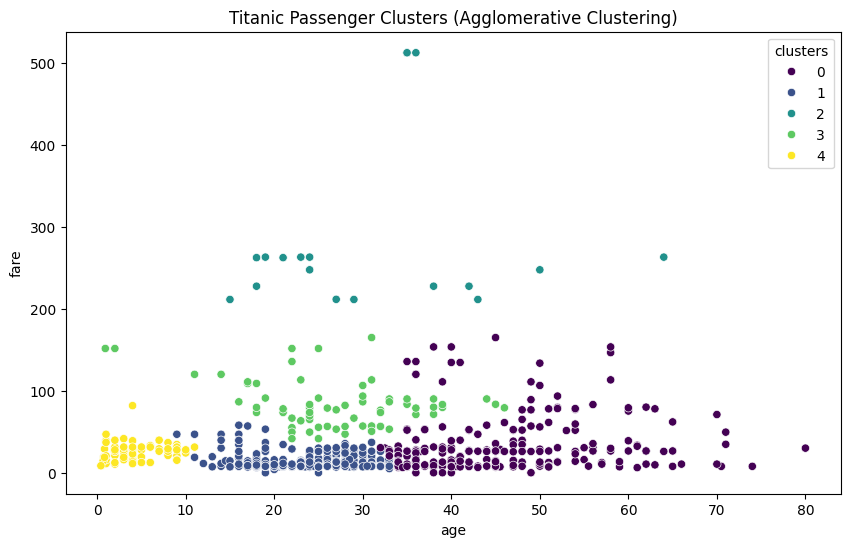

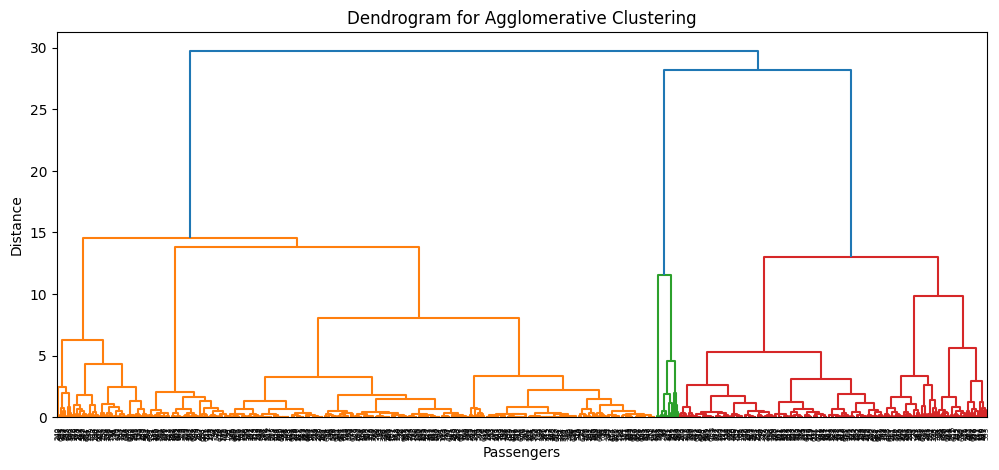

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset and select relevant features
df = sns.load_dataset('titanic')
features = df[['age', 'fare']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply Agglomerative Clustering
agglomerative_clustring = AgglomerativeClustering(n_clusters=5,linkage='ward')
features['clusters']= agglomerative_clustring.fit_predict(scaled_features)
print(features['clusters'].value_counts())

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='age', y='fare', hue='clusters', palette='viridis')
plt.title('Titanic Passenger Clusters (Agglomerative Clustering)')
plt.show()

# Plot the dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linkage(scaled_features, method='ward'))
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Passengers")
plt.ylabel("Distance")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_features, features['clusters'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.432008704459455


In [ ]:
new_data = pd.DataFrame({'age': [25,30,35,40,45,50,55], 'fare': [100,110,120,130,140,150,200]})
scaled_new_data=scaler.transform(new_data)
predicted_clusters = agglomerative_clustring.fit_predict(scaled_new_data)
print("Predicted Clusters:", predicted_clusters)
# print()

Predicted Clusters: [4 1 1 0 0 3 2]


###Divisive Clustering (Top-Down Approach)

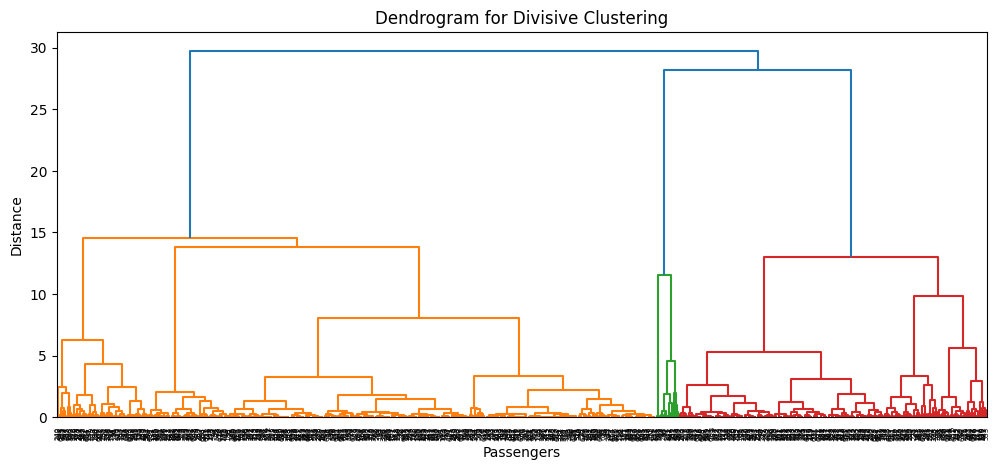

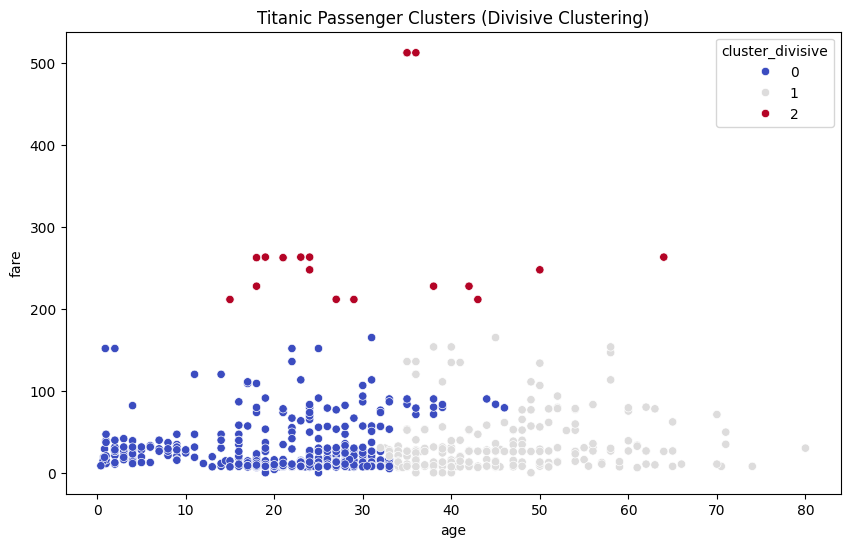

In [ ]:

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using divisive method
# linked = sch.linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linkage(scaled_features, method='ward'))
plt.title("Dendrogram for Divisive Clustering")
plt.xlabel("Passengers")
plt.ylabel("Distance")
plt.show()

# Cutting the dendrogram at a threshold to form clusters
divisive = AgglomerativeClustering(n_clusters=3, linkage='ward')
features['cluster_divisive'] = divisive.fit_predict(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='age', y='fare', hue='cluster_divisive', palette='coolwarm')
plt.title('Titanic Passenger Clusters (Divisive Clustering)')
plt.show()


In [ ]:
print("Silhouette Score:", silhouette_score(scaled_features, features['cluster_divisive']))


Silhouette Score: 0.4363789032267012


#Recomendation system

In [1]:
!pip install -q kaggle opendatasets

import opendatasets as od
od.download("https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/data")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahtishamyousaf
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata


{"username":"mahtishamyousaf","key":"34eab4cde8bfe9517cc5ef4672520156"}

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

import ast
credits=pd.read_csv('/content/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies=pd.read_csv('/content/tmdb-movie-metadata/tmdb_5000_movies.csv')

movies_and_credits=movies.merge(credits,on='title')

#keeping important columns for recomendation
df=movies_and_credits[['movie_id','title','overview','genres','keywords','cast','crew']]

df.dropna(inplace=True)

import ast #for converting str to list
def convert_str_to_list(col):
    actions=[]
    for name in ast.literal_eval(col):
        # print(i)
        actions.append(name['name'])
    return actions

df['genres']=df['genres'].apply(convert_str_to_list)
df['keywords']=df['keywords'].apply(convert_str_to_list)

def convert_cast(col):
    movie_makers=[]
    counter=0
    for movie_maker in ast.literal_eval(col):
        if counter <3: #first three names
            movie_makers.append(movie_maker['name'])
        counter+=1
    return movie_makers

df['cast']=df['cast'].apply(convert_cast)

def convert_crew(col):
    directors=[]
    for member in ast.literal_eval(col):
        if member['job']=='Director': #each movie has one director, getting director from each feature
            directors.append(member['name'])
            break
    return directors

df['crew']=df['crew'].apply(convert_crew)

def remove_spaces(col):
    L1 = []
    for i in col:
        L1.append(i.replace(" ",""))
    return L1

list_of_spaces=['cast','crew','genres','keywords']
for col in list_of_spaces:
    df[col]=df[col].apply(remove_spaces)

df['overview']=df['overview'].apply(lambda x: [x]) #convert overview str to list
# Now concatenate all
df['tags']=df['overview']+df['genres']+df['keywords']+df['cast']+df['crew']
df=df[['movie_id','title','tags']]
df['tags']=df['tags'].apply(lambda x:" ".join(x))

df['tags']=df['tags'].apply(lambda x:x.lower())

import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


def lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Define stop words

    words = []
    for word in text.split():
        if word.lower() not in stop_words:  # Check if word is a stop word
            words.append(wordnet_lemmatizer.lemmatize(word))

    return " ".join(words)

# Assuming df is your DataFrame with the 'tags' column
df['tags'] = df['tags'].apply(lemmatizer)

# now vectorize the tags
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# count_vectorizer=CountVectorizer(max_features=5000,stop_words='english')
tf_idf_vectorizer=TfidfVectorizer(max_features=df.shape[0],stop_words='english')

vectors=tf_idf_vectorizer.fit_transform(df['tags'])

# using cosine similarity for finding similarity between vectors
from sklearn.metrics.pairwise import cosine_similarity
similarities=cosine_similarity(vectors)

def recomend(movie):
    movie_index=df[df['title']==movie].index[0]
    distances=similarities[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]

    for movie in movies_list:
        print(df.iloc[movie[0]].title)

recomend('Batman')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Batman
Batman & Robin
Batman Returns
The Dark Knight Rises
Batman Begins


In [11]:
import difflib

def recomend(movie_name):
    # Find closest matching movie title
    closest_match = difflib.get_close_matches(movie_name, df['title'].values, n=1, cutoff=0.7)

    if not closest_match:
        print(f"Movie '{movie_name}' not found in the dataset.")

    closest_match = closest_match[0]  # Use the closest match
    index = df[df['title'] == closest_match].index[0]
    print('closest match:',closest_match,index)
    print()
    distances = sorted(list(enumerate(similarities[index])),
                      reverse=True,
                      key=lambda x: x[1])

    for movie in distances[1:6]:
        print(df.iloc[movie[0]].title)

recomend('batman')

closest match: Batman 1360

Batman
Batman & Robin
Batman Returns
The Dark Knight Rises
Batman Begins


In [19]:
import pickle
pickle.dump(similarities,open('similarities.pkl','wb'))
# now download this model
from google.colab import files
files.download('similarities.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Reshape vectors[0] and vectors[1] to 2D arrays
# similarities = cosine_similarity(vectors[10].reshape(1, -1), vectors[11].reshape(1, -1))
similarities = cosine_similarity(vectors)
similarities_df=pd.DataFrame(similarities)
similarities_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,4756,4757,4758,4759,4760,4761,4762,4763,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773,4774,4775,4776,4777,4778,4779,4780,4781,4782,4783,4784,4785,4786,4787,4788,4789,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805
0,1.000000,0.022825,0.032749,0.022203,0.110003,0.052591,0.003372,0.084195,0.020547,0.025918,0.034504,0.035600,0.025793,0.009927,0.033938,0.021041,0.020674,0.074476,0.065430,0.030738,0.015887,0.045325,0.021547,0.025944,0.011789,0.019681,0.090082,0.104172,0.047816,0.032771,0.018952,0.087918,0.038131,0.024583,0.000000,0.026861,0.132876,0.036988,0.017501,0.022464,0.015480,0.090515,0.000000,0.043703,0.007892,0.060280,0.073974,0.176041,0.029164,0.031234,...,0.000000,0.056404,0.000000,0.008409,0.000000,0.011012,0.000000,0.000000,0.000000,0.000000,0.004053,0.014252,0.000000,0.000000,0.000000,0.011170,0.004830,0.006979,0.0,0.007154,0.000000,0.037093,0.000000,0.000000,0.015721,0.040553,0.033237,0.000000,0.011528,0.000000,0.000000,0.005339,0.000000,0.005436,0.029361,0.000000,0.000000,0.059246,0.000000,0.000000,0.000000,0.000000,0.029840,0.044927,0.000000,0.004289,0.009751,0.021760,0.006484,0.000000
1,0.022825,1.000000,0.013060,0.003395,0.034325,0.065814,0.003325,0.077293,0.020266,0.025565,0.024048,0.017849,0.415753,0.077729,0.043773,0.026253,0.028010,0.204531,0.009881,0.045829,0.020122,0.013049,0.021253,0.025590,0.098699,0.100453,0.055610,0.033785,0.013111,0.009627,0.067546,0.032608,0.046007,0.033306,0.021199,0.022835,0.031819,0.016113,0.032378,0.012467,0.015269,0.026882,0.000000,0.015243,0.007785,0.024127,0.042030,0.034471,0.046975,0.021754,...,0.000000,0.000000,0.000000,0.008294,0.000000,0.000000,0.011446,0.012440,0.011621,0.000000,0.012252,0.000000,0.000000,0.000000,0.000000,0.000000,0.004764,0.000000,0.0,0.007056,0.023634,0.022678,0.008564,0.009102,0.010124,0.021827,0.005655,0.000000,0.011306,0.005401,0.014655,0.005236,0.010323,0.010663,0.006610,0.000000,0.000000,0.000000,0.009646,0.000000,0.000000,0.000000,0.005407,0.000000,0.000000,0.004231,0.000000,0.016607,0.000000,0.000000
2,0.032749,0.013060,1.000000,0.014241,0.027218,0.028982,0.003612,0.080001,0.031789,0.017258,0.038265,0.343912,0.014759,0.010634,0.013722,0.027819,0.012461,0.077998,0.068159,0.024343,0.009091,0.014172,0.009099,0.082822,0.012628,0.000000,0.054770,0.024705,0.039055,0.291012,0.029744,0.014506,0.018880,0.014817,0.000000,0.016189,0.056714,0.006898,0.042605,0.013540,0.042047,0.026909,0.000000,0.020899,0.008454,0.004314,0.074041,0.068281,0.021433,0.019070,...,0.000000,0.000000,0.050675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020672,0.000000,0.000000,0.000000,0.066238,0.000000,0.005174,0.000000,0.0,0.018632,0.000000,0.000000,0.000000,0.000000,0.000000,0.052767,0.000000,0.014115,0.000000,0.000000,0.023433,0.000000,0.000000,0.000000,0.000000,0.040874,0.000000,0.000000,0.000000,0.032181,0.049380,0.000000,0.000000,0.000000,0.022550,0.011172,0.000000,0.016283,0.000000,0.000000
3,0.022203,0.003395,0.014241,1.000000,0.013032,0.020114,0.009365,0.049113,0.024820,0.251047,0.052493,0.015473,0.003836,0.002764,0.045161,0.009977,0.035058,0.002720,0.008139,0.013895,0.026394,0.064074,0.000000,0.000000,0.036745,0.044759,0.061467,0.005243,0.013934,0.052595,0.052945,0.093873,0.028108,0.007513,0.000000,0.033806,0.062077,0.000000,0.034679,0.037061,0.029207,0.059486,0.000000,0.025649,0.005081,0.015028,0.003581,0.043994,0.002923,0.001964,...,0.004870,0.039853,0.008769,0.002553,0.000000,0.021231,0.010097,0.014104,0.000000,0.036685,0.015474,0.007569,0.021319,0.000000,0.044737,0.003093,0.011735,0.013589,0.0,0.049240,0.000000,0.003904,0.010663,0.002570,0.006303,0.022013,0.028195,0.025753,0.056376,0.001525,0.014885,0.001478,0.002914,0.030570,0.043944,0.010495,0.002616,0.003799,0.000000,0.021641,0.002885,0.005103,0.015141,0.004956,0.015496,0.013292,0.000000,0.015695,0.053537,0.028474
4

In [ ]:
sorted(list(enumerate((similarities[0]))),reverse=True,key=lambda x:x[1])[1:6]

[(2405, np.float64(0.23924034517830223)),
 (3728, np.float64(0.20388350755225584)),
 (582, np.float64(0.20084640375542057)),
 (3606, np.float64(0.18878451098324764)),
 (942, np.float64(0.18670356891366963))]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence embedding model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

# Sentences to compare
sentences = ["I love machine learning", "Machine learning is amazing", "Cats are cute"]

# Convert sentences to embeddings
embeddings = model.encode(sentences)

# Calculate cosine similarity
cos_sim = cosine_similarity([embeddings[1]], [embeddings[2]])  # Comparing 1st and 2nd sentence
print("Cosine Similarity:", cos_sim)


Cosine Similarity: [[0.27228582]]


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

vec1 = [[1, 2, 3]]
vec2 = [[1, 4, 3]]

distance = euclidean_distances(vec1, vec2)
print("Euclidean Distance:", distance[0][0])


Euclidean Distance: 2.0


In [ ]:
from sklearn.metrics import jaccard_score

set1 = [1, 1, 0, 1, 0, 1]
set2 = [1, 0, 0, 1, 1, 1]

similarity = jaccard_score(set1, set2)
print("Jaccard Similarity:", similarity)


Jaccard Similarity: 0.6


In [ ]:
tf_idf_vectorizer.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [ ]:
vectors_df=pd.DataFrame(vectors,columns=tf_idf_vectorizer.get_feature_names_out())
vectors_df.iloc[0].describe()

,0
count,4806.000000
mean,0.001055
std,0.014388
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.382904


In [ ]:
import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Define stop words

def lemmatizer(text):
    T = []
    for i in text.split():
        if i.lower() not in stop_words:  # Check if word is a stop word
            T.append(wordnet_lemmatizer.lemmatize(i))

    return " ".join(T)

# Assuming df is your DataFrame with the 'tags' column
print(lemmatizer(df['tags'][0]))
print(len(stop_words))
wordnet_lemmatizer.get_feature_names_out()

22nd century, paraplegic marine dispatched moon pandora unique mission, becomes torn following order protecting alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron
198


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'WordNetLemmatizer' object has no attribute 'get_feature_names_out'

In [ ]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download("wordnet")
nltk.download("omw-1.4")

# Initialize
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example words
words = ["running", "caring", "studies", "better",'beautiful','lovely']

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in words]
print("Stemmed Words:", stemmed_words)

# Apply lemmatization
lemmatized_words = [lemmatizer.lemmatize(word, pos="v") for word in words]
print("Lemmatized Words:", lemmatized_words)



Stemmed Words: ['run', 'care', 'studi', 'better', 'beauti', 'love']
Lemmatized Words: ['run', 'care', 'study', 'better', 'beautiful', 'lovely']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df['cast'][0]
df['tags'][0]

KeyError: 'tags'

In [ ]:
def director(col):
    directors=[]
    for i in ast.literal_eval(col):
        if i['job']=='Director': #each movie has one director, getting director from each feature
            directors.append(i['name'])
            break
    return directors

print(director(df['crew'][0]))

['James Cameron']


In [ ]:
def convert_cast(col):
    movie_makers=[]
    directors=[]
    counter=0

    for movie_maker in ast.literal_eval(col):
        movie_makers.append(movie_maker['name'])
        if counter == 2: #first three names
            break
        counter+=1
    return movie_makers

print(convert_cast(df['cast'][0]))

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']


In [ ]:
one=df.iloc[0]['genres']
genres_list=ast.literal_eval(one)
genres_list[0]['name']

'Action'

In [ ]:
import ast #for converting str to list
def convert_str_to_list(col):
    names=[]
    if
    for name in ast.literal_eval(col):
        # print(i)
        names.append(name['name'])
    return names

# convert_str_to_list(df['genres'][1])
df['genres']=df['genres'].apply(convert_str_to_list)
# df

<ipython-input-7-1661bed12940>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres']=df['genres'].apply(convert_str_to_list)


In [ ]:
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [ ]:
df['keywords'] = df['keywords'].apply(convert_str_to_list)
df

<ipython-input-8-3f3e2346ecd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'] = df['keywords'].apply(convert_str_to_list)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [ ]:
df['cast'][0]
cast_list=ast.literal_eval(df['cast'][0])
cast_list[0]['name']
#

'Sam Worthington'

In [ ]:
credits['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [ ]:
def convert_cast(col):
    names=[]
    counter=0
    for name in ast.literal_eval(col):
        if counter <3: #first three names
            names.append(name['name'])
        counter+=1
    return names

# convert_cast(df['cast'][0])
df['cast']=df['cast'].apply(convert_cast)
df

<ipython-input-9-9c2dc484f6da>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast']=df['cast'].apply(convert_cast)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[Daniel Henney, Eliza Coupe, Bill Paxton]","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [ ]:
df['crew'][0]

['Stephen E. Rivkin',
 'Rick Carter',
 'Christopher Boyes',
 'Christopher Boyes',
 'Mali Finn',
 'James Horner',
 'James Cameron',
 'James Cameron',
 'James Cameron',
 'James Cameron',
 'James Cameron',
 'Andrew Menzies',
 'Jill Brooks',
 'Margery Simkin',
 'Kevin Ishioka',
 'Dick Bernstein',
 'Shannon Mills',
 'Dennie Thorpe',
 'Jana Vance',
 'Deborah Lynn Scott',
 'Jon Landau',
 'Sean Haworth',
 'Kim Sinclair',
 'Kim Sinclair',
 'Richard F. Mays',
 'Laeta Kalogridis',
 'Mayes C. Rubeo',
 'Mauro Fiore',
 'Scott Herbertson',
 'Woody Schultz',
 'Linda DeVetta',
 'Linda DeVetta',
 'Richard Bluck',
 'Simon Bright',
 'Richard Martin',
 'Steve R. Moore',
 'John Refoua',
 'Karl J. Martin',
 'Chiling Lin',
 'Ilram Choi',
 'Steven Quale',
 'Carla Meyer',
 'Nick Bassett',
 'Jill Cormack',
 'Andy McLaren',
 'Terry Notary',
 'Garrett Warren',
 'Jonathan Rothbart',
 'Stefan Dechant',
 'Todd Cherniawsky',
 'Miranda Rivers',
 'Robert Stromberg',
 'John Harding',
 'Roberto De Angelis',
 'Mike Smithso

In [ ]:
def fetch_director(col):
    names=[]
    for i in ast.literal_eval(col):
        if i['job']=='Director': #each movie has one director, getting director from each feature
            names.append(i['name'])
            break
    return names

# fetch_director(df['crew'][1])
df['crew']=df['crew'].apply(fetch_director)
df

<ipython-input-10-286f1ca46824>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crew']=df['crew'].apply(fetch_director)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [ ]:
df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

`split()` method, without any arguments, splits a string into a list of words based on spaces.





In [ ]:
df['overview']=df['overview'].apply(lambda x:x.split())
df

<ipython-input-11-65e03595e4f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview']=df['overview'].apply(lambda x:x.split())


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]",[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


In [ ]:
df['overview'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [ ]:
# now removing space like that
'Anna Kendrick'
'AnnaKendrick'

def remove_spaces(col):
    L1 = []
    for i in col:
        L1.append(i.replace(" ",""))
    return L1

# df['cast'] = df['cast'].apply(remove_spaces)
# df['crew'] = df['crew'].apply(remove_spaces)
# df['genres'] = df['genres'].apply(remove_spaces)
# df['keywords'] = df['keywords'].apply(remove_spaces)

remove_list=['cast','crew','genres','keywords']
for col in remove_list:
    df[col]=df[col].apply(remove_spaces)


df

<ipython-input-13-9461f1ac1746>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].apply(remove_spaces)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez]
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns]
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith]
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia]


In [ ]:
# Now concatenate all
df['tags']=df['overview']+df['genres']+df['keywords']+df['cast']+df['crew']
df

<ipython-input-14-c516ce5bfd12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags']=df['overview']+df['genres']+df['keywords']+df['cast']+df['crew']


,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia],"[When, ambitious, New, York, attorney, Sam, is..."


In [ ]:
df['tags'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [ ]:
#droping extra columns
new_df=df[['movie_id','title','tags']]
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [ ]:
df['tags'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

So, the cell that previously contained `['word1', 'word2', 'word3']` will now contain `"word1 word2 word3"`.

In [ ]:
new_df['tags']=new_df['tags'].apply(lambda x:"".join(x))
new_df.head()

<ipython-input-17-9cf4d862be3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:"".join(x))


,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [ ]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [ ]:
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())
new_df.head()

<ipython-input-19-b9f3b444339a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [ ]:
df=new_df[['movie_id','title','tags']]
df

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,a newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...


In [ ]:
df['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

###NLP for Recommendation system

#### Stemming

In [ ]:
import nltk
from nltk.stem import PorterStemmer

porter_stemmer=PorterStemmer()

def stems(text):
    T=[]
    for i in text.split():
        T.append(porter_stemmer.stem(i))

    return " ".join(T)
# stems('generously')
stems('in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [ ]:
from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer("english") # Specify the language
word = "in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron"
stemmed_word = snowball_stemmer.stem(word)
print(stemmed_word)  # Output: generous

in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron


In [ ]:
from nltk.stem import LancasterStemmer

lancaster_stemmer = LancasterStemmer()
word = "in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron"
stemmed_word = lancaster_stemmer.stem(word)
print(stemmed_word)  # Output: activ

in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron


In [ ]:
from nltk.stem import RegexpStemmer

regexp_stemmer = RegexpStemmer('ing$|s$|e$|ed$|ly$', min=4) # Remove 'ing', 's', 'e', 'ed' endings
word = "generously"
stemmed_word = regexp_stemmer.stem(word)
print(stemmed_word)  # Output: sing

generous


In [ ]:
import nltk
from nltk.stem import SnowballStemmer

snowball_stemmer=SnowballStemmer(language='english')

def stems(text):
    T=[]
    for i in text.split():
        T.append(snowball_stemmer.stem(i))

    return " ".join(T)

stems(df['tags'][0])

# df['tags']=df['tags'].apply(stems)
# df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [ ]:
snowball_stemmer.stem('in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission,')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission,'

####Lemmatization

**1. Lemmatization with NLTK's WordNetLemmatizer**

In [ ]:
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')  # Download WordNet data (if not already downloaded)
nltk.download('omw-1.4')


wordnet_lemmatizer=WordNetLemmatizer()
def lemmatize(text):
    T=[]
    for i in text.split():
        T.append(wordnet_lemmatizer.lemmatize(i))

    return " ".join(T)

lemmatize(df['tags'][0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following order and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

**2. Using spaCy for Lemmatizatio**n

In [ ]:
import spacy

nlp=spacy.load('en_core_web_sm') #load spaCy english model

def lemmatize(text):
    doc=nlp(text)
    lemmas=[token.lemma_ for token in doc]
    return " ".join(lemmas)

lemmatize(df['tags'][0])

'in the 22nd century , a paraplegic marine be dispatch to the moon pandora on a unique mission , but become tear between follow order and protect an alien civilization . action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelation mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

**3. Word Embeddings with Gensim**

In [ ]:
!pip install -q gensim
from gensim.models import Word2Vec

# Assume you have a list of sentences called 'sentences'
sentences = [["this", "is", "a", "sentence"], ["another", "sentence", "here"]]

model = Word2Vec(sentences, min_count=1)  # Train Word2Vec model

# Get word embedding for a word
vector = model.wv['sentence']
print(vector)  # Output: The word embedding vector for 'sentence'

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

 this code takes the text data in the 'tags' column, extracts the 5000 most frequent words (excluding common English words), and creates numerical vectors representing the frequency of these words for each movie. These vectors can then be used for tasks like movie recommendation, where movies with similar word vectors are considered to be similar in content.

In [ ]:
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy

nltk.download("wordnet")
nltk.download("omw-1.4")

# Initialize stemmers
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

# Initialize lemmatizers
wordnet = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")

words = ["running", "caring", "studies", "better"]

# Apply stemmers
print("Porter Stemming:", [porter.stem(word) for word in words])
print("Lancaster Stemming:", [lancaster.stem(word) for word in words])
print("Snowball Stemming:", [snowball.stem(word) for word in words])

# Apply lemmatizers
print("WordNet Lemmatization:", [wordnet.lemmatize(word, pos="v") for word in words])
print("SpaCy Lemmatization:", [token.lemma_ for token in nlp(" ".join(words))])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Porter Stemming: ['run', 'care', 'studi', 'better']
Lancaster Stemming: ['run', 'car', 'study', 'bet']
Snowball Stemming: ['run', 'care', 'studi', 'better']
WordNet Lemmatization: ['run', 'care', 'study', 'better']
SpaCy Lemmatization: ['run', 'care', 'study', 'well']


**Vectorizers**

In [ ]:
df['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #using bag-of-words technique
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer=CountVectorizer(max_features=5,stop_words='english')
tf_idf_vectorizer=TfidfVectorizer(max_features=5000)

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
cv_vectors=count_vectorizer.fit_transform(corpus).toarray()
tf_idf_vectors=tf_idf_vectorizer.fit_transform(corpus).toarray()


cv_vectors
tf_idf_vectors
print(tf_idf_vectorizer.get_feature_names_out())
print(tf_idf_vectors.shape)
print((count_vectorizer.get_feature_names_out()))
print(cv_vectors.shape)

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
(4, 9)
['document' 'second']
(4, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample text data
documents = ["AI is amazing amazing!", "AI will change the world world!", "I love learning AI."]

# Count Vectorizer (Bag of Words)
count_vec = CountVectorizer(stop_words='english')
count_matrix = count_vec.fit_transform(documents)

print("Count Vectorizer (Bag of Words):")
print(count_matrix.toarray())
print(count_vec.get_feature_names_out())

# TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vec.fit_transform(documents)

print("\nTF-IDF Vectorizer:")
print(tfidf_matrix.toarray())
print(tfidf_vec.get_feature_names_out())


Count Vectorizer (Bag of Words):
[[1 2 0 0 0 0]
 [1 0 1 0 0 2]
 [1 0 0 1 1 0]]
['ai' 'amazing' 'change' 'learning' 'love' 'world']

TF-IDF Vectorizer:
[[0.28321692 0.95905588 0.         0.         0.         0.        ]
 [0.2553736  0.         0.43238509 0.         0.         0.86477018]
 [0.38537163 0.         0.         0.65249088 0.65249088 0.        ]]
['ai' 'amazing' 'change' 'learning' 'love' 'world']


In [ ]:
# !pip install -q gensim==4.3.3 numpy==1.25.1 pandas==2.0.3
!pip install --upgrade numpy
!pip install --upgrade pandas
import numpy as np
import pandas as pd

!pip install --upgrade gensim scipy
from gensim.models import Word2Vec

sentences = [["I", "love", "AI"], ["AI", "is", "powerful"], ["Machine", "learning", "is", "fun"]]
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, workers=4)

print(model.wv.most_similar("AI"))


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp

ModuleNotFoundError: No module named 'numpy.strings'

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade scikit-learn
!pip install --upgrade transformers

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

text = "Machine learning is amazing!"
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)

# print(outputs.last_hidden_state.shape)  # (batch_size, sequence_length, hidden_size)
# print(outputs.pooler_output.shape)  # (batch_size, hidden_size)
print(outputs.pooler_output.shape)

torch.Size([1, 768])


In [ ]:
# print(vector[0].shape)
# print(count_vectorizer.get_feature_names_out())
# print(len(count_vectorizer.get_feature_names_out()))
# print(vector.shape)
# print(vector[1000].min())
# print(vector[1000].max())
vector_df=pd.DataFrame(vector,columns=count_vectorizer.get_feature_names_out())
vector_df

(5000,)
['000' '007' '10' ... 'zone' 'zoo' 'zooeydeschanel']
5000
(4806, 5000)
0
2


,000,007,10,100,11,12,13,14,15,16,...,zealand,zebra,zeu,zoe,zoesaldana,zombi,zombies,zone,zoo,zooeydeschanel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vector)
similarity
similarity_df=pd.DataFrame(similarity)
similarity_df
#

,0,1,2,3,4,5,6,7,8,9,...,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805
0,1.000000,0.084717,0.086031,0.073947,0.197908,0.110378,0.039637,0.148431,0.060248,0.096730,...,0.000000,0.000000,0.043748,0.054841,0.000000,0.022076,0.046829,0.045431,0.000000,0.000000
1,0.084717,1.000000,0.061546,0.019838,0.079640,0.118445,0.021267,0.132733,0.064651,0.103800,...,0.000000,0.000000,0.023473,0.000000,0.000000,0.023689,0.000000,0.024376,0.000000,0.000000
2,0.086031,0.061546,1.000000,0.060437,0.080875,0.072169,0.021597,0.134791,0.065653,0.105409,...,0.088388,0.000000,0.000000,0.000000,0.020146,0.048113,0.000000,0.024754,0.000000,0.000000
3,0.073947,0.019838,0.060437,1.000000,0.034758,0.062032,0.055690,0.069515,0.042324,0.237835,...,0.028490,0.027639,0.061466,0.038526,0.025974,0.062032,0.000000,0.031915,0.050965,0.071191
4,0.197908,0.079640,0.080875,0.034758,1.000000,0.062257,0.055892,0.162791,0.028318,0.113666,...,0.038125,0.000000,0.000000,0.025777,0.000000,0.020752,0.000000,0.021354,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,0.022076,0.023689,0.048113,0.062032,0.020752,0.018519,0.033250,0.083010,0.050540,0.040572,...,0.000000,0.066010,0.018349,0.046004,0.031016,1.000000,0.000000,0.000000,0.020286,0.042505
4802,0.046829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.070014,0.000000,0.000000,0.032898,0.000000,1.000000,0.121268,0.000000,0.000000
4803,0.045431,0.024376,0.024754,0.031915,0.021354,0.000000,0.000000,0.000000,0.052005,0.020874,...,0.070014,0.033962,0.018881,0.023669,0.015958,0.000000,0.121268,1.000000,0.041748,0.043737
4804,0.000000,0.000000,0.000000,0.050965,0.000000,0.020286,0.036424,0.000000,0.055364,0.022222,...,0.000000,0.036155,0.020101,0.000000,0.000000,0.020286,0.000000,0.041748,1.000000,0.046562


In [ ]:
df[df['title']=='The Lego Movie']


,movie_id,title,tags
744,137106,The Lego Movie,"an ordinari lego mini-figure, mistaken thought..."


In [ ]:
df[df['title']=='The Lego Movie'].index[0]

np.int64(744)

In [ ]:
similarity[744]

array([0.06488857, 0.06859943, 0.03535534, ..., 0.02773501, 0.        ,
       0.        ])

In [ ]:
similarity[744].min()
similarity[744].max()
#

np.float64(1.0000000000000002)

In [ ]:
def recomend(movie_name):
    # Check if movie_name exists in the DataFrame
    if movie_name not in df['title'].values:
        print(f"Movie '{movie_name}' not found in the dataset.")
        return  # Exit the function if the movie is not found

    index = df[df['title'] == movie_name].index[0]
    distances = sorted(list(enumerate(similarity[index])),
                      reverse=True,
                      key=lambda x: x[1])

    for movie in distances[1:6]:
        print(df.iloc[movie[0]].title)

recomend('spider man')  # Change 'Avator' to 'Avatar' (if that's the intended movie)

Movie 'spider man' not found in the dataset.


1360


In [ ]:

pickle.dump(new_df,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

#Filter Based recommendations


**Books Recommender system using clustering**

This method recommends items based on the past behavior and preferences of other users. It doesn't require knowledge about the items themselves but instead relies on the interactions or ratings from users.

In [ ]:
# necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -q kaggle opendatasets

import opendatasets as od

od.download('https://www.kaggle.com/datasets/ra4u12/bookrecommendation')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahtishamyousaf
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ra4u12/bookrecommendation


In [ ]:
rating=pd.read_csv('/content/bookrecommendation/BX-Book-Ratings.csv',sep=";", on_bad_lines='skip', encoding='latin-1')
books=pd.read_csv('/content/bookrecommendation/BX-Books.csv',sep=";", on_bad_lines='skip', encoding='latin-1')
users=pd.read_csv('/content/bookrecommendation/BX-Users.csv',sep=";", on_bad_lines='skip', encoding='latin-1')

<ipython-input-5-7d961f2a1a26>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('/content/bookrecommendation/BX-Books.csv',sep=";", on_bad_lines='skip', encoding='latin-1')


In [ ]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
books=books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-L']]
books.rename(columns={'Book-Title':'title',
                      'Book-Author':'author',
                      'Year-Of-Publication':'year',
                      'Publisher':'publisher'},inplace=True)

books

<ipython-input-8-0bb9f1bdee73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns={'Book-Title':'title',


,ISBN,title,author,year,publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
users.rename(columns={'User-ID':'user_id',
                      'Location':'location',
                      'Age':'age'},inplace=True)

users

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
rating.rename(columns={'User-ID':'user_id',
                        'Book-Rating':'rating'},inplace=True)
rating

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
print(books.shape)
print(users.shape)
print(rating.shape)


(271360, 6)
(278858, 3)
(1149780, 3)


In [ ]:
rating['user_id'].value_counts()

,count
user_id,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
119573,1
276706,1
276697,1


#Reinforcement Learning

In [ ]:
import numpy as np
import random

# Define the environment as a simple grid
states = ["Start", "Path1", "Path2", "Goal"]
actions = ["Move Forward", "Stay"]
rewards = {"Start": 0, "Path1": 1, "Path2": 2, "Goal": 10}

# Initialize Q-table (Q-values)
Q_table = np.zeros((len(states), len(actions)))

# Training the agent
for episode in range(100):  # Run for 100 episodes
    state = 0  # Start state
    while state != 3:  # Until we reach "Goal"
        action = random.choice([0, 1])  # Choose action randomly
        next_state = state + 1 if action == 0 else state  # Move forward or stay
        reward = rewards[states[next_state]]  # Get reward
        Q_table[state, action] = reward  # Update Q-value
        state = next_state  # Move to next state

# Print final Q-table
print("Final Q-table:")
print(Q_table)


Final Q-table:
[[ 1.  0.]
 [ 2.  1.]
 [10.  2.]
 [ 0.  0.]]
